# 6.3 Mini-project: Applying supervised learning to predict student dropout

**Welcome to your Mini-project: Applying supervised learning to predict student dropout rate**

In this project, we will examine student data and use supervised learning techniques to predict whether a student will drop out. In the education sector, retaining students is vital for the institution's financial stability and for students’ academic success and personal development. A high dropout rate can lead to significant revenue loss, diminished institutional reputation, and lower overall student satisfaction.

You will work with the data in three distinct stages:

1.  Applicant and course information
2.  Student and engagement data
3.  Academic performance data

These stages reflect Study Group’s real-world data journey and how student information has progressed and become available. Additionally, this approach enables you, through data exploration, to support Study Group in better understanding and identifying key metrics to monitor. This approach will also assist you in determining at which stage of the student journey interventions would be most effective.

Please set aside approximately **12 hours** to complete the mini-project.

## Business context
Study Group specialises in providing educational services and resources to students and professionals across various fields. The company's primary focus is on enhancing learning experiences through a range of services, including online courses, tutoring, and educational consulting. By leveraging cutting-edge technology and a team of experienced educators, Study Group aims to bridge the gap between traditional learning methods and the evolving needs of today's learners.

Study Group serves its university partners by establishing strategic partnerships to enhance the universities’ global reach and diversity. It supports the universities in their efforts to attract international students, thereby enriching the cultural and academic landscape of their campuses. It works closely with university faculty and staff to ensure that the universities are prepared and equipped to welcome and support a growing international student body. Its partnership with universities also offers international students a seamless transition into their chosen academic environment.

Study Group runs several International Study Centres across the UK and Dublin in partnership with universities with the aim of preparing a pipeline of talented international students from diverse backgrounds for degree study. These centres help international students adapt to the academic, cultural, and social aspects of studying abroad. This is achieved by improving conversational and subject-specific language skills and academic readiness before students progress to a full degree programme at university.

Through its comprehensive suite of services, it supports learners and universities at every stage of their educational journey, from high school to postgraduate studies. Its approach is tailored to meet the unique needs of each learner, offering personalised learning paths and flexible scheduling options to accommodate various learning styles and commitments.

Study Group's services are designed to be accessible and affordable, making quality education a reality for many individuals. By focusing on the integration of technology and personalised learning, the company aims to empower learners to achieve their full potential and succeed in their academic and professional pursuits. Study Group is at the forefront of transforming how people learn and grow through its dedication to innovation and excellence.

Study Group has provided you with 3 data sets.


## Objective
By the end of this mini-project, you will have developed the skills and knowledge to apply advanced machine learning techniques to create a predictive model for student dropout. This project will involve comprehensive data exploration, preprocessing, and feature engineering to ensure high-quality input for the models. You will employ and compare multiple predictive algorithms, such as XGBoost, and a neural network-based model, to determine the most effective model for predicting student dropout.

In the Notebook, you will:
- explore the data sets, taking a phased approach
- preprocess the data and conduct feature engineering
- predict the dropout rate using XGBoost, and a neural network-based model.

You will also write a report summarising the results of your findings and recommendations.

## Assessment criteria
By completing this project, you’ll be able to provide evidence that you can:

- develop accurate predictions across diverse organisational scenarios by building and testing advanced ML models
- inform data-driven decision-making with advanced machine learning algorithms and models
- propose and present effective solutions to organisational problems using data preprocessing, model selection, and insightful analysis techniques.

## Project guidance
1.   Navigate to **Mini-project 6.3 Applying supervised learning to predict student dropout**, and save a copy of the activity Notebook to your Drive.

2. Please refer to the Rubric for specific steps to be performed as part of the project activity. Every step mentioned in the rubric will be assessed separately.

3. When you’ve completed the activity:
  - download your completed Notebook as an IPYNB (Jupyter Notebook) or PY (Python) file
  - save the file as follows: **LastName_FirstName_CAM_C201_Week_6_Mini-project**.

4. Prepare a detailed report (800–1,000 words) that includes an overview of your approach, a description of your analysis, and an explanation of the insights you identified - Please refer to the Rubric for further details that should form a part of your analysis and report. Save the document as a PDF named according to the following convention: **LastName_FirstName_CAM_C201_W6_Mini-project.pdf**.

5. Submit your Notebook and PDF document.




In [ ]:
# Imported key packages for project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.metrics import Accuracy, Precision, Recall, AUC
!pip install keras-tuner
import keras_tuner
from keras_tuner import RandomSearch, Hyperband

# Stage 1 data

In [ ]:
# File URL
file_url = "https://drive.google.com/uc?id=1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6"

# Load file in Pandas dataframe
data = pd.read_csv(file_url)

In [ ]:
data.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nanjing             Pre-Masters   
1                   Xi'an              Foundation   
2                 Chengdu  International Year Two   
3  LIUYANG CITY ;CHANGSHA  International Year Two   
4                  Xiamen             Pre-Masters   

                                          CourseName  IsFirstIntake  \
0                       Business and Law Pre-Masters           True   
1   Life Sciences Undergraduate Foundation Programme          False   
2  Business Management and Finance International ...          False   
3  Business Management and Finance International ...           True   
4                       Business and Law Pre-Masters           True   

  CompletedCourse                              ProgressionDegree  \
0             Yes  Msc Econ Accounting and Investment Management   
1             Yes                        BSc Biological Sciences   
2             Yes                                     MA Finance   
3             Yes                         MA Business Management   
4             Yes          MSc International Business Management   

    ProgressionUniversity  
0  University of Aberdeen  
1  University of Aberdeen  
2  University of Aberdeen  
3  University of Aberdeen  
4  University of Aberdeen

In [ ]:
# Show datatypes & missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CentreName             25059 non-null  object
 1   LearnerCode            25059 non-null  int64 
 2   BookingType            25059 non-null  object
 3   LeadSource             25059 non-null  object
 4   DiscountType           7595 non-null   object
 5   DateofBirth            25059 non-null  object
 6   Gender                 25059 non-null  object
 7   Nationality            25059 non-null  object
 8   HomeState              8925 non-null   object
 9   HomeCity               21611 non-null  object
 10  CourseLevel            25059 non-null  object
 11  CourseName             25059 non-null  object
 12  IsFirstIntake          25059 non-null  bool  
 13  CompletedCourse        25059 non-null  object
 14  ProgressionDegree      24184 non-null  object
 15  ProgressionUniversi

**Stage 1: Pre-processing instructions**
- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with > 50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.

In [ ]:
# Transform main features

# Convert data types
data['DateofBirth'] = pd.to_datetime(data['DateofBirth'], dayfirst=True)
today = pd.Timestamp.now()
data['Age'] = (today - data['DateofBirth']).dt.days / 365.25
data['Age'] = data['Age'].round(0).astype(int)
# note: astype('<m8[Y]') cannot convert from timedelta directly to years

#Convert Target variable Yes & No column to boolean values
data['CompletedCourse'] = data['CompletedCourse'].map({'Yes': 1, 'No': 0}) #.astype(bool)
data['IsFirstIntake'] = data['IsFirstIntake'].astype(int)

print('Complete')

Complete


In [ ]:
# Check the Unique values per column
data.nunique()

CentreName                  19
LearnerCode              24877
BookingType                  2
LeadSource                   7
DiscountType                11
DateofBirth               4705
Gender                       2
Nationality                151
HomeState                 2448
HomeCity                  5881
CourseLevel                  4
CourseName                 172
IsFirstIntake                2
CompletedCourse              2
ProgressionDegree         2616
ProgressionUniversity       40
Age                         38
dtype: int64

In [ ]:
# Check for missing values
data.isnull().sum()

CentreName                   0
LearnerCode                  0
BookingType                  0
LeadSource                   0
DiscountType             17464
DateofBirth                  0
Gender                       0
Nationality                  0
HomeState                16134
HomeCity                  3448
CourseLevel                  0
CourseName                   0
IsFirstIntake                0
CompletedCourse              0
ProgressionDegree          875
ProgressionUniversity        0
Age                          0
dtype: int64

In [ ]:
# Drop columns with more that 200 unique values per feature & more than 50% missing data
data.drop(['LearnerCode', 'DateofBirth', 'HomeState', 'HomeCity', 'ProgressionDegree',  'DiscountType'], axis=1, inplace=True)
data.head()

CentreName BookingType              LeadSource Gender Nationality  \
0  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   
1  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   
2  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   
3  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   
4  ISC_Aberdeen       Agent  Standard Agent Booking   Male     Chinese   

              CourseLevel                                         CourseName  \
0             Pre-Masters                       Business and Law Pre-Masters   
1              Foundation   Life Sciences Undergraduate Foundation Programme   
2  International Year Two  Business Management and Finance International ...   
3  International Year Two  Business Management and Finance International ...   
4             Pre-Masters                       Business and Law Pre-Masters   

   IsFirstIntake  CompletedCourse   ProgressionUniversity  Age  
0              1                1  University of Aberdeen   27  
1              0                1  University of Aberdeen   27  
2              0                1  University of Aberdeen   25  
3              1                1  University of Aberdeen   26  
4              1                1  University of Aberdeen   29

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CentreName             25059 non-null  object
 1   BookingType            25059 non-null  object
 2   LeadSource             25059 non-null  object
 3   Gender                 25059 non-null  object
 4   Nationality            25059 non-null  object
 5   CourseLevel            25059 non-null  object
 6   CourseName             25059 non-null  object
 7   IsFirstIntake          25059 non-null  int64 
 8   CompletedCourse        25059 non-null  int64 
 9   ProgressionUniversity  25059 non-null  object
 10  Age                    25059 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.1+ MB


In [ ]:
# Check the Data balance for the target variable
data['CompletedCourse'].value_counts()

CompletedCourse
1    21305
0     3754
Name: count, dtype: int64

This demonstrates that the data is not balanced. As this may impact the predictive performance of the model, we will address this imbalance by applying stratification when splitting the data into training and testing sets, and we will be aiming to maximise AUC as the key evaluation metric, given its suitability for imbalanced datasets.

In [ ]:
# Describe the numeric variables
data.describe().round(2)

IsFirstIntake  CompletedCourse       Age
count       25059.00         25059.00  25059.00
mean            0.12             0.85     24.99
std             0.33             0.36      3.17
min             0.00             0.00     19.00
25%             0.00             1.00     23.00
50%             0.00             1.00     24.00
75%             0.00             1.00     27.00
max             1.00             1.00     63.00

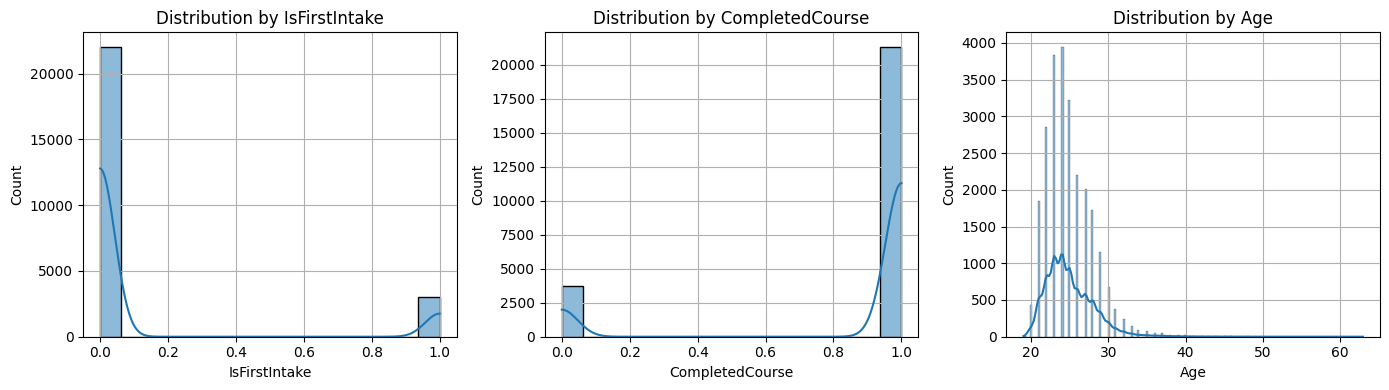

In [ ]:
# Visualise the numerical variables
# list of int64 type columns
int_cols = data.select_dtypes(include='int64').columns

plt.figure(figsize=(14,4))

for i, col in enumerate(int_cols):
    plt.subplot(1,len(int_cols),i+1)
    sns.histplot(data=data[int_cols],x=col,kde=True)
    plt.title(f'Distribution by {col}')
    plt.grid()
    plt.tight_layout()

plt.show() # Note-to-self: should be outside the loop to keep subplot structure

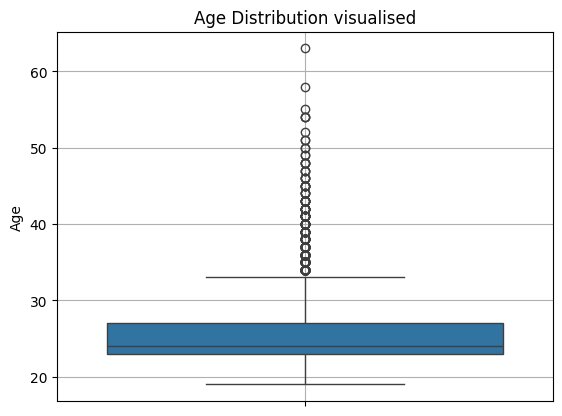

In [238]:
# Inspect outliers for Age feature
plt.title('Age Distribution visualised')
sns.boxplot(data=data['Age'])
plt.grid()

Due to the large number of categories per feature, only the 10 most frequent values are displayed on the graphs below, while the remaining are grouped under 'Other'.

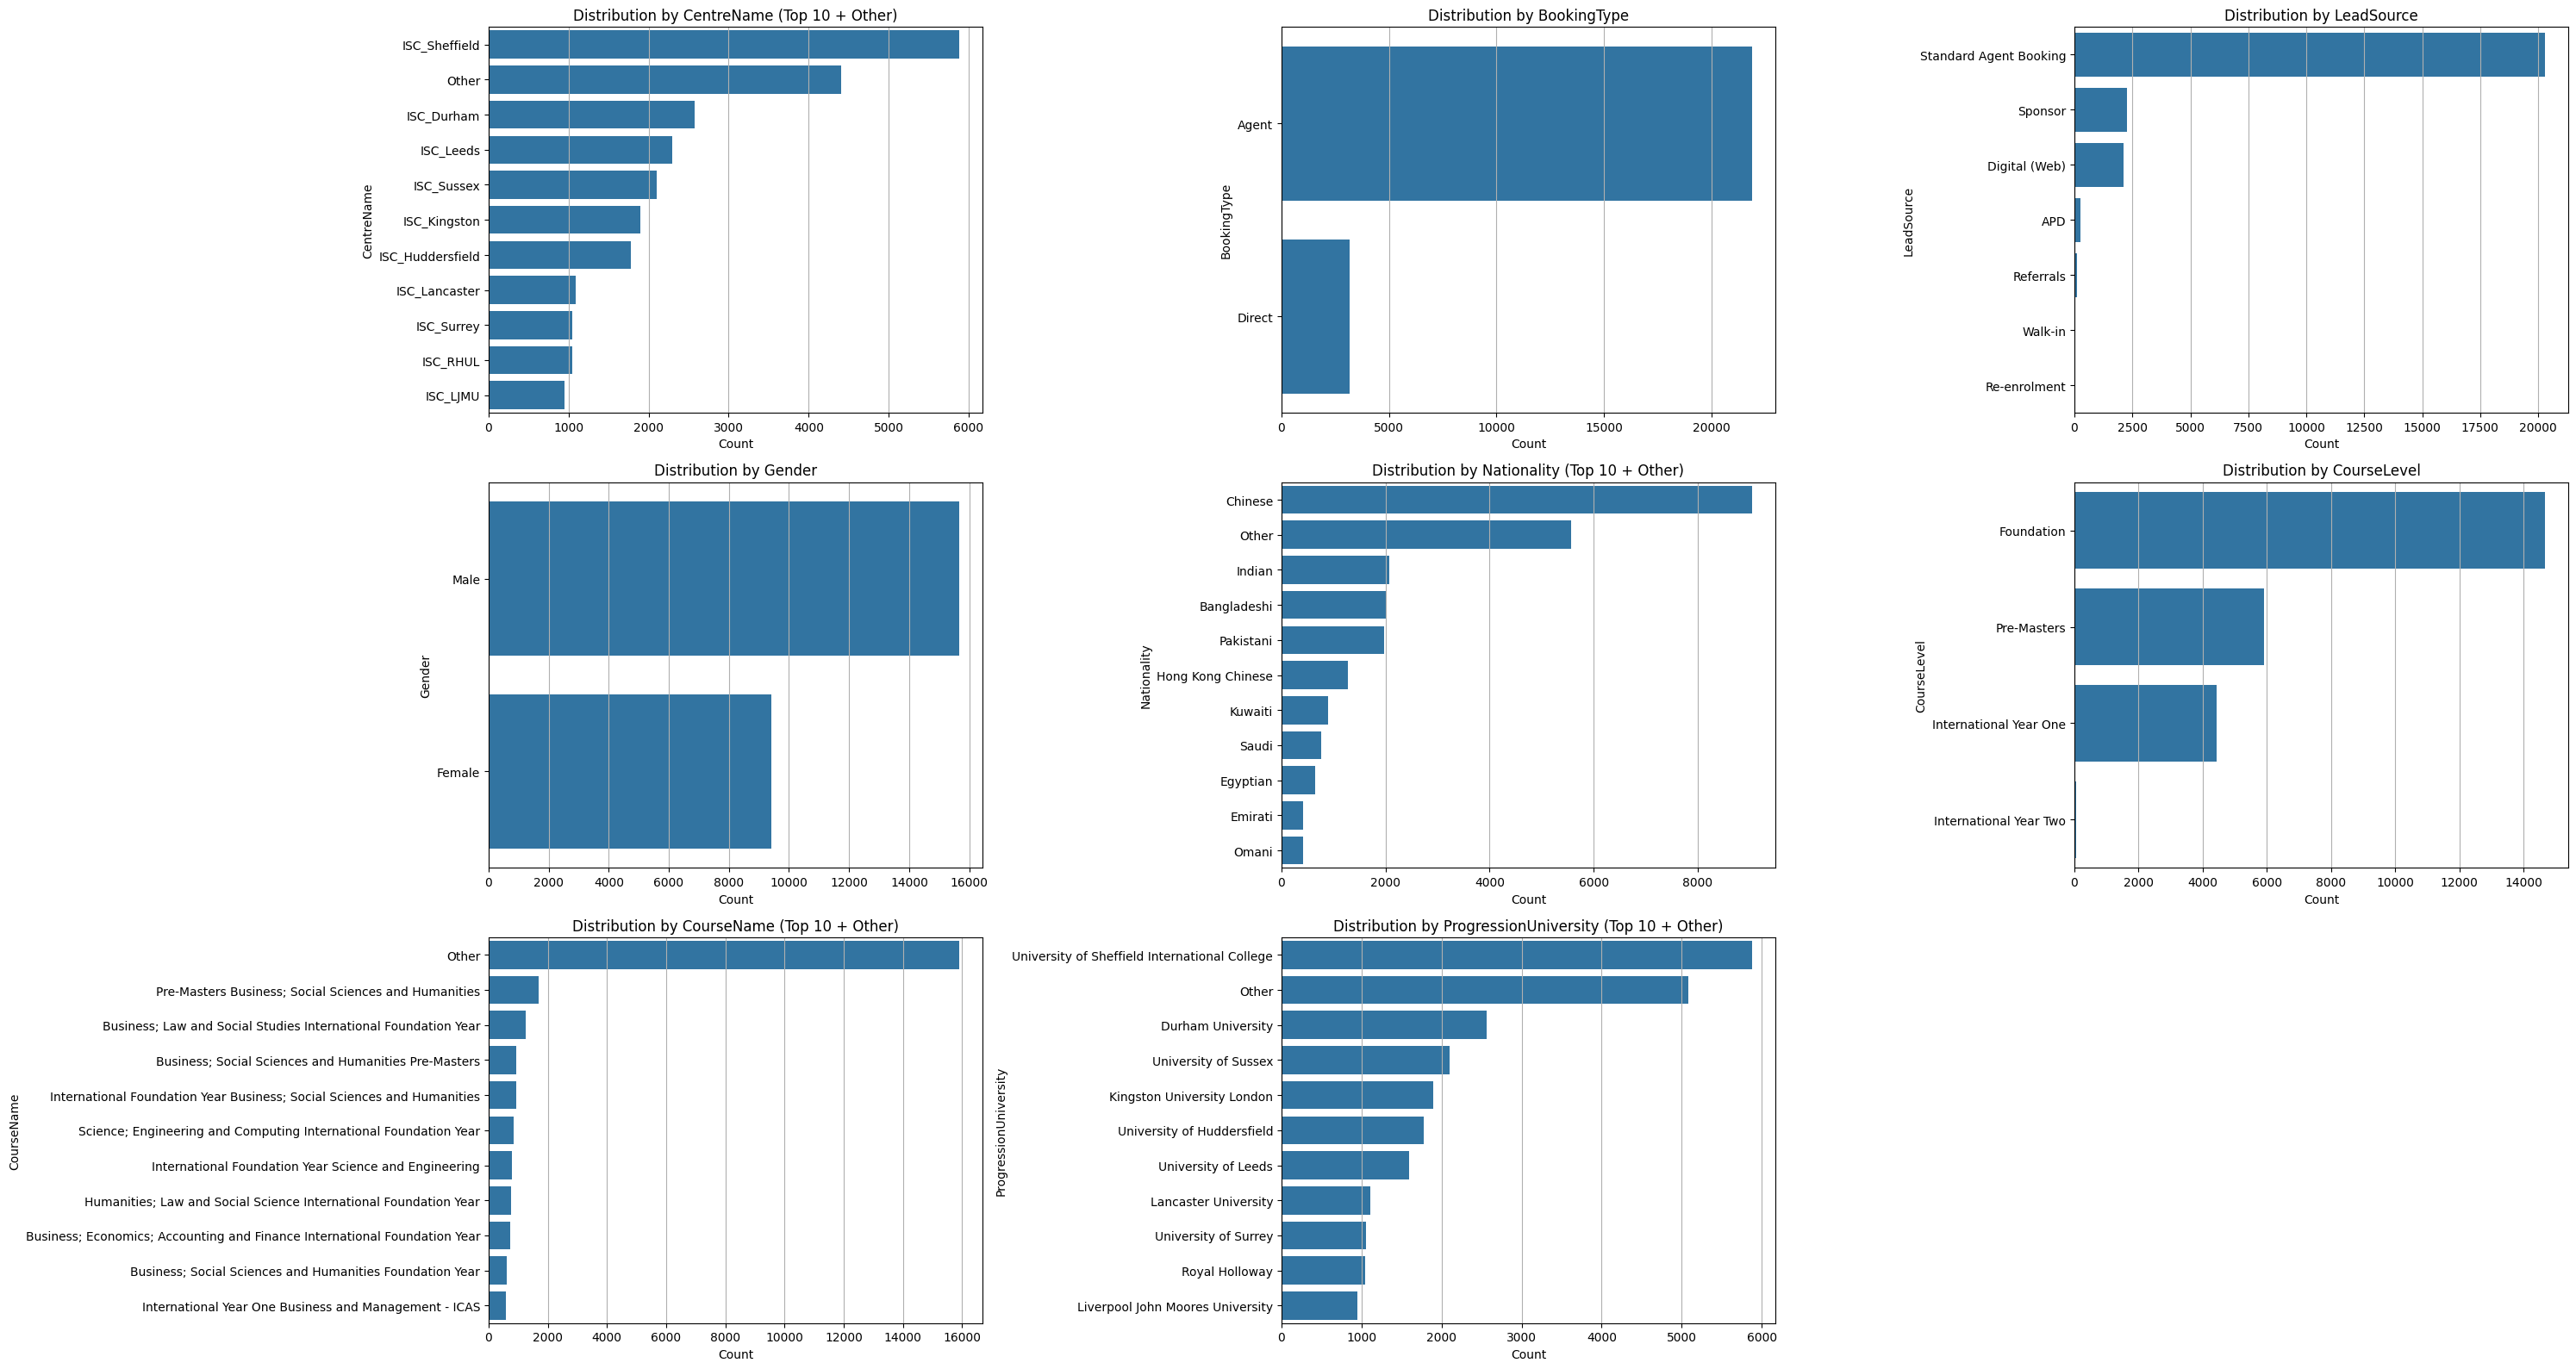

In [ ]:
# Visualise the categorical features
obj_cols = data.select_dtypes(include='object').columns

# Number of categorical columns
num_obj_cols = len(obj_cols)
plt.figure(figsize=(30,16))

for i, col in enumerate(obj_cols):
    plt.subplot(3,3,i+1)
    top_n = 10 # Number of categories to show
    # Check if column grouping is needed
    if data[col].nunique() > top_n:
        top_categories = data[col].value_counts().nlargest(top_n).index.tolist()
        grouped_data = data[col].apply(lambda x: x if x in top_categories else 'Other').copy()
        sns.countplot(data=None, y=grouped_data, order=grouped_data.value_counts().index)
        plt.title(f'Distribution by {col} (Top {top_n} + Other)')

    else:
        sns.countplot(data=data, y=col, order=data[col].value_counts().index)
        plt.title(f'Distribution by {col}') # Title without 'Top N + Other'

    plt.xlabel('Count')
    plt.grid(axis='x') # Horizontal grid lines for better visualisation
plt.tight_layout()
plt.show()

In [ ]:
# Review categories for Course Levels
data['CourseLevel'].unique()

array(['Pre-Masters', 'Foundation', 'International Year Two',
       'International Year One'], dtype=object)

In [ ]:
# Import encoders and convert features
from sklearn.preprocessing import OrdinalEncoder

# One-Hot-Encoding using pandas for obj-type features
data = pd.get_dummies(data,columns=['CentreName','BookingType','LeadSource','Gender','Nationality','CourseName','ProgressionUniversity'],
                      dtype=int)

# Ordinal encoding Ordinal feature: Course Level
OE = OrdinalEncoder(categories=[['Foundation','International Year One', 'International Year Two', 'Pre-Masters']])
data['CourseLevel'] = OE.fit_transform(data[['CourseLevel']])
data['CourseLevel'] = data['CourseLevel'].astype(int)

data.head()

CourseLevel  IsFirstIntake  CompletedCourse  Age  CentreName_ISC_Aberdeen  \
0            3              1                1   27                        1   
1            0              0                1   27                        1   
2            2              0                1   25                        1   
3            2              1                1   26                        1   
4            3              1                1   29                        1   

   CentreName_ISC_Cardiff  CentreName_ISC_Dublin  CentreName_ISC_Durham  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   CentreName_ISC_Holland  CentreName_ISC_Huddersfield  ...  \
0                       0                            0  ...   
1                       0                            0  ...   
2                       0                            0  ...   
3                       0                            0  ...   
4                       0                            0  ...   

   ProgressionUniversity_University College Dublin  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   ProgressionUniversity_University of Aberdeen  \
0                                             1   
1                                             1   
2                                             1   
3                                             1   
4                                             1   

   ProgressionUniversity_University of Huddersfield  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   ProgressionUniversity_University of Leeds  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   ProgressionUniversity_University of Lincoln  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   ProgressionUniversity_University of Sheffield International College  \
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     

   ProgressionUniversity_University of Strathclyde  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   ProgressionUniversity_University of Surrey  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   ProgressionUniversity_University of Sussex  \
0                        

In [ ]:
# Define the dataset & target variable
y = data['CompletedCourse'].copy()
x = data.drop(['CompletedCourse'],axis=1).copy()

# Split the data into Train/Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

# Scale the training data (necessary for the NN, non-consequential for XGBoost)
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = RobustScaler()  # using robust as there are outliers in the age feature
x_train['Age'] = scaler.fit_transform(x_train[['Age']])
x_test['Age'] = scaler.transform(x_test[['Age']])

# Define the Training & Validation sets for the NN
nn_x_train, nn_x_val, nn_y_train, nn_y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42,stratify=y_train)

In [ ]:
x_test.head()

CourseLevel  IsFirstIntake   Age  CentreName_ISC_Aberdeen  \
5665            1              0  0.00                        0   
2342            3              0  1.25                        0   
6085            1              0 -0.75                        0   
8127            0              0  3.25                        0   
4493            1              1  0.25                        0   

      CentreName_ISC_Cardiff  CentreName_ISC_Dublin  CentreName_ISC_Durham  \
5665                       0                      0                      0   
2342                       0                      0                      1   
6085                       0                      0                      0   
8127                       0                      0                      0   
4493                       0                      0                      0   

      CentreName_ISC_Holland  CentreName_ISC_Huddersfield  \
5665                       0                            1   
2342                       0                            0   
6085                       0                            1   
8127                       0                            0   
4493                       0                            1   

      CentreName_ISC_Kingston  ...  \
5665                        0  ...   
2342                        0  ...   
6085                        0  ...   
8127                        0  ...   
4493                        0  ...   

      ProgressionUniversity_University College Dublin  \
5665                                                0   
2342                                                0   
6085                                                0   
8127                                                0   
4493                                                0   

      ProgressionUniversity_University of Aberdeen  \
5665                                             0   
2342                                             0   
6085                                             0   
8127                                             0   
4493                                             0   

      ProgressionUniversity_University of Huddersfield  \
5665                                                 1   
2342                                                 0   
6085                                                 1   
8127                                                 0   
4493                                                 1   

      ProgressionUniversity_University of Leeds  \
5665                                          0   
2342                                          0   
6085                                          0   
8127                                          0   
4493                                          0   

      ProgressionUniversity_University of Lincoln  \
5665                                            0   
2342                                            0   
6085                                            0   
8127                                            0   
4493                                            0   

      ProgressionUniversity_University of Sheffield International College  \
5665                                                  0                     
2342                                                  0                     
6085                                                  0                     
8127                                                  0                     
4493                                                  0                     

      ProgressionUniversity_University of Strathclyde  \
5665                                                0   
2342                                                0   
6085                                                0   
8127                                                0   
4493                                                0   

      ProgressionUniversity_University of Surrey  \
5665                                 

In [ ]:
# Inspect distribution for the Training target feature
nn_y_train.value_counts(normalize=True)

CompletedCourse
1    0.850183
0    0.149817
Name: proportion, dtype: float64

In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
# Import XGBoost, Neural networks with Keras, metrics, optimisers, tuning
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.metrics import Accuracy, Precision, Recall, AUC
import keras_tuner

## Neural Network & Tuning


In [ ]:
# Neural Network model
NN_Dropout = Sequential([
Input(shape=(nn_x_train.shape[1],)),
Dense(400,activation='relu'),
Dense(200,activation='relu'),
Dense(1,activation='sigmoid')])

NN_Dropout.summary()

#Define the evaluation metrics
keras_metrics = ['accuracy', 'precision', 'recall', 'AUC']

# Process pipeline
NN_Dropout.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=keras_metrics)   # gives better results ['accuracy']
History = NN_Dropout.fit(nn_x_train, nn_y_train, epochs=50, batch_size=64, validation_data=(nn_x_val, nn_y_val)) # verbose=2
Evaluation = NN_Dropout.evaluate(x_test, y_test)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 400)            │       158,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 239,201 (934.38 KB)

 Trainable params: 239,201 (934.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - AUC: 0.8352 - accuracy: 0.8767 - loss: 0.3132 - precision: 0.8945 - recall: 0.9701 - val_AUC: 0.8926 - val_accuracy: 0.9002 - val_loss: 0.2570 - val_precision: 0.9155 - val_recall: 0.9724
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - AUC: 0.8857 - accuracy: 0.8954 - loss: 0.2649 - precision: 0.9219 - recall: 0.9580 - val_AUC: 0.8972 - val_accuracy: 0.8958 - val_loss: 0.2500 - val_precision: 0.9207 - val_recall: 0.9601
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - AUC: 0.8839 - accuracy: 0.8999 - loss: 0.2587 - precision: 0.9255 - recall: 0.9598 - val_AUC: 0.8946 - val_accuracy: 0.8933 - val_loss: 0.2566 - val_precision: 0.9085 - val_recall: 0.9724
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - AUC: 0.8875 - accuracy: 0.8991 - loss: 0.2635 - precision: 0.9215 - recall: 0.9631 - val_AUC: 0.9007 - val_accuracy: 0.9032 - val_loss: 0.2501 - val_precision: 0.9232 - val_recall: 0.9666
Epoch 5/50
282/282 ━━━━━━━━━━━

Loss value: 0.3373956084251404 
Test Accuracy: 0.8800877928733826 
Test Precision: 0.9168564677238464 
Test Recall: 0.9446139335632324 
Test AUC: 0.8589622378349304 

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:


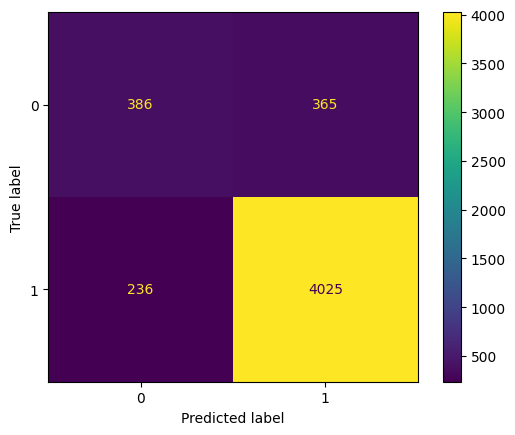

In [ ]:
# Print performance metrics on Test dataset
print('Loss value:',       Evaluation[0],
      '\nTest Accuracy:',  Evaluation[1],
      '\nTest Precision:', Evaluation[2],
      '\nTest Recall:',    Evaluation[3],
      '\nTest AUC:',       Evaluation[4],
      '\n')

# Create Confusion matrix
Predictions = NN_Dropout.predict(x_test)
y_pred = (Predictions >= 0.5).astype(int)
print('Confusion Matrix:')
cmds = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,)

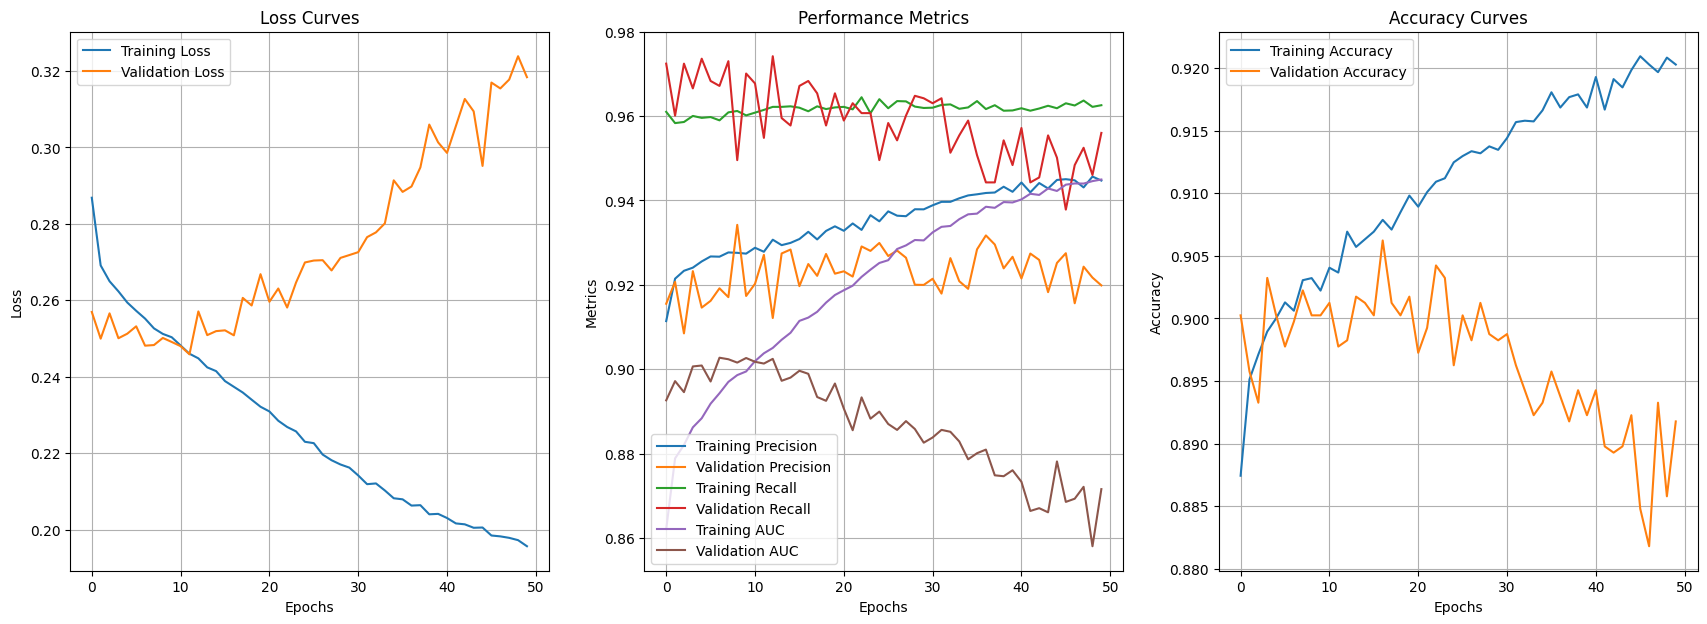

In [ ]:
# Plot Loss & performance curves for the training & validation sets
plt.figure(figsize=(21,7))
plt.subplot(1,3,1)
plt.plot(History.history['loss'], label='Training Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.grid()

plt.subplot(1,3,2)
plt.plot(History.history['precision'], label='Training Precision')
plt.plot(History.history['val_precision'], label='Validation Precision')
plt.plot(History.history['recall'], label='Training Recall')
plt.plot(History.history['val_recall'], label='Validation Recall')
plt.plot(History.history['AUC'], label='Training AUC')
plt.plot(History.history['val_AUC'], label='Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Performance Metrics')
plt.legend()
plt.grid()

plt.subplot(1,3,3)
plt.plot(History.history['accuracy'], label='Training Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()
plt.grid()

plt.show()

The Training & Validation Loss curve indicates that the model begins to overfit after 10 Epochs, which would suggest that an early stopping callback should be introduced to limit this and allow us to produce better metric results.

In terms of the Performance metrics, the model was able to achive an average score of 89% with the highest being - **Recall: 0.937**

Examination of the Neural Network's training and validation loss curves indicated that overfitting commenced around epoch 10. This overfitting suggests that the model's generalisation ability was diminishing.

To mitigate this, an Early Stopping callback will be introduced during future training & tuning runs to halt the process before significant overfitting occurs.

Evaluating the default Neural Network's performance on the test set, the model achieved an average metric score of 89%, with a notable Recall of 0.937, but a lower AUC score of 0.858. Consistent with the objective for imbalanced datasets, the focus for model tuning and evaluation will be on maximising the AUC metric.

Trial 10 Complete [00h 01m 48s]
val_loss: 0.2559579461812973

Best val_loss So Far: 0.2464713677763939
Total elapsed time: 00h 23m 01s


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       203,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 96)             │        49,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 384)            │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 384)            │       147,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 224)            │        86,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 524,065 (2.00 MB)

 Trainable params: 524,065 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

None

Best hyperparameters found by the tuner:
{'units': 512, 'optimizer': 'sgd', 'activation': 'relu', 'num_layers': 5, 'units_0': 512, 'learning_rate_adam': 0.005766746418921648, 'units_1': 96, 'units_2': 384, 'units_3': 384, 'units_4': 224, 'learning_rate_sgd': 0.007560585479298688}
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8746 - accuracy: 0.8992 - loss: 0.2695 - precision: 0.9247 - recall: 0.9607
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Comparison of Default and Tuned Model Metrics on Test Data:


Default model  Tuned model
Loss            0.337396     0.268748
Accuracy        0.880088     0.895251
Precision       0.916856     0.921670
Recall          0.944614     0.958226
AUC             0.858962     0.883869

Confusion Matrix:


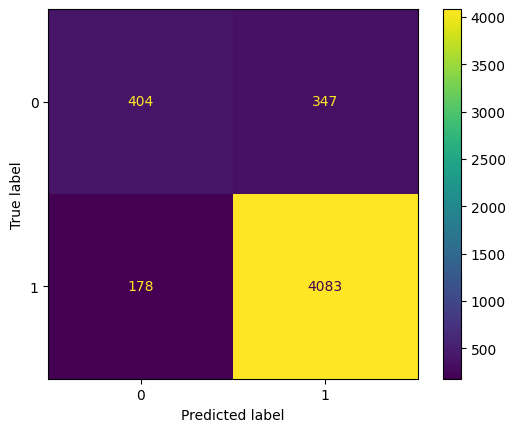

In [ ]:
# Import tuner modules
from keras_tuner import RandomSearch, Hyperband

# 1. Define the model builder function & hyperparameter search space
def build_model(hp):
  NN_tuned = Sequential()
  # Input layer
  NN_tuned.add(Input(shape=(nn_x_train.shape[1],)))
  # Hyperparameters
  neuron_count = hp.Int('units', min_value=32, max_value=512, step=32) #units=hp.Int(f'units_{i}' > n_neurons in each layer
  opt_func = hp.Choice('optimizer', ['adam','rmsprop','sgd'])
  actv_func = hp.Choice('activation', ['relu', 'tanh'])

  # Hidden layers
  for i in range(hp.Int('num_layers', 1, 5)):
    neuron_count = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32) ### EACH LAYER HAS DIFFERENT NEURON COUNTS
    NN_tuned.add(Dense(units=neuron_count, activation=actv_func))
  # Output layer
  NN_tuned.add(Dense(units=1, activation='sigmoid'))

  # Adjust optimiser's learning rate
  if opt_func == 'adam':
    opt_func = Adam(learning_rate=hp.Float('learning_rate_adam', min_value=1e-4, max_value=1e-2, sampling='log'))
  elif opt_func == 'rmsprop':
    opt_func = RMSprop(learning_rate=hp.Float('learning_rate_adam', min_value=1e-4, max_value=1e-2, sampling='log'))
  elif opt_func == 'sgd':
    opt_func = SGD(learning_rate=hp.Float('learning_rate_sgd', min_value=1e-4, max_value=1e-2, sampling='log'))

  # Compile
  NN_tuned.compile(loss='binary_crossentropy', optimizer=opt_func, metrics=keras_metrics)
  return NN_tuned

  # Build the model
build_model(keras_tuner.HyperParameters())

# 2. Instantiate & Run the Search
tuner = RandomSearch(hypermodel=build_model, objective='val_loss',
                     max_trials=10, executions_per_trial=2,
                     overwrite=True, directory='my_dir',
                     project_name='student_dropout_NN_tuned')
# Get a summary
tuner.search_space_summary()
# Run search
tuner.search(nn_x_train, nn_y_train, epochs=50, validation_data=(nn_x_val, nn_y_val),
             callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# 3. Explore results
# Best Model
best_model = tuner.get_best_models(num_models=1)[0]
print(best_model.summary())
# Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest hyperparameters found by the tuner:")
print(best_hps.values)

# 4. Evaluate
Evaluation_Tuned = best_model.evaluate(x_test, y_test)

# 5. Predict & Compare models
Tuned_pred = best_model.predict(x_test)
y_tuned_pred = (Tuned_pred >= 0.5).astype(int)

# Comparing Default & Tuned Model prediction metrics (on TEST data)
output_comparison = {'Default model': Evaluation, 'Tuned model': Evaluation_Tuned}
metric_names = ['Loss', 'Accuracy', 'Precision', 'Recall', 'AUC']
metrics_result = pd.DataFrame(output_comparison, index=metric_names)
print("\nComparison of Default and Tuned Model Metrics on Test Data:")
display(metrics_result) # Use display for better formatting in Colab
print('Confusion Matrix:')
cmds = ConfusionMatrixDisplay.from_predictions(y_test, y_tuned_pred)

## XGBoost & Tuning


Test Accuracy: 0.8944533120510774
Test Precision: 0.921028880866426
Test Recall: 0.957991081905656
Test AUC: 0.7459729044681409
Confusion Matrix for XGB:


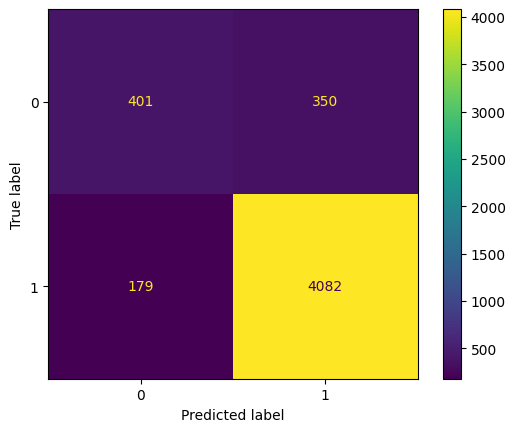

In [ ]:
## The XGBOOST model fitted on the training dataset (use 80-20 split)
XGB_Dropped = XGBClassifier(random_state=42)
XG_trained = XGB_Dropped.fit(x_train, y_train)
XGB_pred = XGB_Dropped.predict(x_test)

# Calculate the metric performances for the XGB model
default_accuracy = accuracy_score(y_test, XGB_pred)
default_precision = precision_score(y_test, XGB_pred)
default_recall = recall_score(y_test, XGB_pred)
default_roc_auc = roc_auc_score(y_test, XGB_pred)

print('Test Accuracy:', default_accuracy)
print('Test Precision:', default_precision)
print('Test Recall:', default_recall)
print('Test AUC:', default_roc_auc)
print('Confusion Matrix for XGB:')
XGB_cmds = ConfusionMatrixDisplay.from_predictions(y_test, XGB_pred)

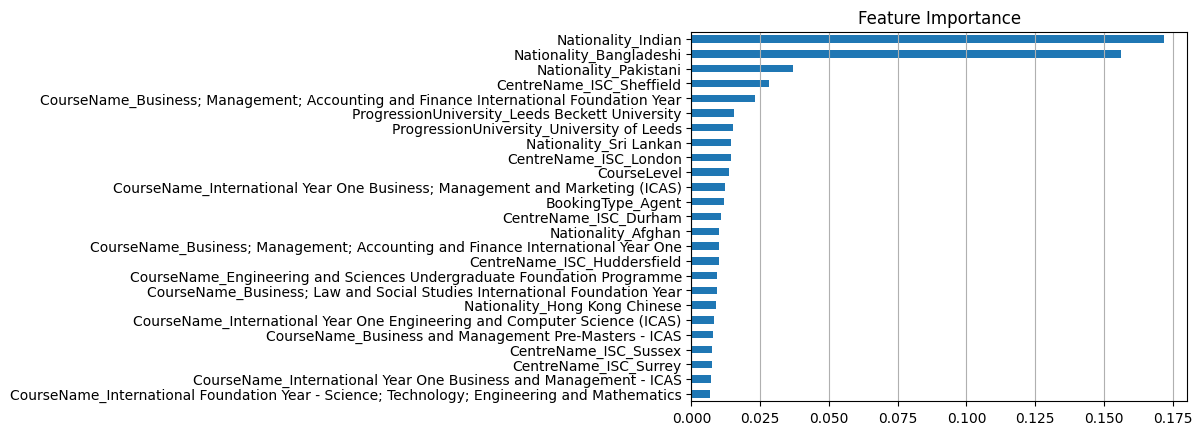

In [ ]:
# The plot of features importance has been correctly printed and commented on.
feature_importance = pd.Series(XG_trained.feature_importances_, index=x_train.columns).sort_values()
feature_importance.iloc[-25:].plot.barh(title='Feature Importance') # show only the top most 25
plt.grid(axis='x')

Among the student demographic and course-related features for Stage 1, nationality emerged as a significant predictor of potential dropout, with a notable association for students identifying as Indian/Pakistani/Bangladeshi. This insight provides StudyGroup with the oportunity to implement proactive measures during the pre-enrolment phase. By identifying this demographic as potentially at-risk, StudyGroup can develop and offer targeted support, orientation programmes, or resources tailored to the specific needs of these students, thereby increasing their likelihood of successful course completion.

#### Grid/RandomizerSearchCV:

In the process of tuning the XGBoost model, both RandomizedSearchCV and GridSearchCV were employed. As the results obtained from these two approaches were nearly identical, the following sections will highlight the application and outcomes of one of these tuning methods respectively.

In [ ]:
"""
# For RandomizedSearchCV
# Define the parameter distribution
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_dist = {'n_estimators': randint(100, 500),    # Sample from integers between 100 and 500
              'max_depth': randint(3, 10),          # Sample from integers between 3 and 10
              'learning_rate': uniform(0.01, 0.1)}  # Sample from a uniform distribution between 0.01 and 0.1
"""

"# For RandomizedSearchCV\n# Define the parameter distribution\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom scipy.stats import uniform, randint\nparam_dist = {'n_estimators': randint(100, 500),    # Sample from integers between 100 and 500\n              'max_depth': randint(3, 10),          # Sample from integers between 3 and 10\n              'learning_rate': uniform(0.01, 0.1)}  # Sample from a uniform distribution between 0.01 and 0.1\n"

In [ ]:
# Import the necessary module
from sklearn.model_selection import GridSearchCV
# Define the Grid to be used in the search
grid = {'learning_rate':[0.01, 0.05, 0.1],
        'max_depth':[3, 6, 12],
        'n_estimators':[100, 200, 300]}
# Define the evaluation metrics to calculate
sklearn_metrics = ['accuracy', 'precision', 'recall', 'roc_auc']

# Instantiate the GridSearch with relevant parameters
XGB_GridSearch = GridSearchCV(XGB_Dropped,
                              param_grid=grid,
                              scoring=sklearn_metrics,
                              cv=5, verbose=2,
                              refit='roc_auc', return_train_score=True)
                              # Refit on a single metric, 'roc_auc' is good for imbalanced data
# Apply the GS to the model
XGB_GridSearch.fit(x_train, y_train)
# Explore outputs
print(XGB_GridSearch.best_params_) #Show the best parameters
print(XGB_GridSearch.best_estimator_) #Show the best model settings
print(XGB_GridSearch.best_score_) #Show the cross-validated score for the estimator specified in refit arg
#print(XGB_GridSearch.cv_results_) #Dictionary with keys and values

# Define the tuned model with best parameters
XGB_Tuned = XGB_GridSearch.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [ ]:
# Explore outputs
print(XGB_GridSearch.best_params_) #Show the best parameters
print(XGB_GridSearch.best_estimator_) #Show the best model settings
print(XGB_GridSearch.best_score_) #Show the cross-validated score for the estimator specified in refit arg
#print(XGB_GridSearch.cv_results_) #Dictionary with keys and values

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
0.8822793621417067


Test Accuracy: 0.8944533120510774
Test Precision: 0.9174496644295302
Test Recall: 0.9624501290776813
Test AUC: 0.7355526277878419
Confusion Matrix for Tuned XGB:


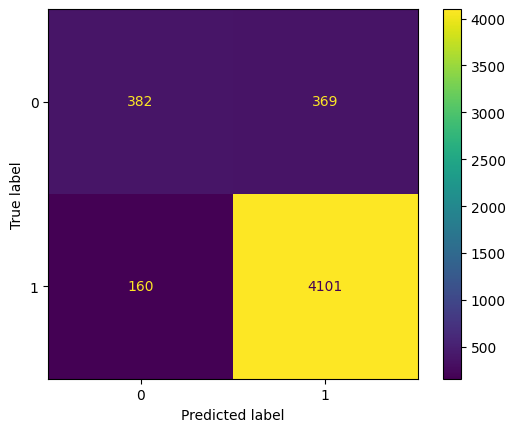

In [ ]:
# Define the tuned model with best parameters
XGB_Tuned = XGB_GridSearch.best_estimator_
# Predict outputs using tuned models & display performance metrics
XGB_GridSearch_pred = XGB_Tuned.predict(x_test)

tuned_accuracy = accuracy_score(y_test, XGB_GridSearch_pred)
tuned_precision = precision_score(y_test, XGB_GridSearch_pred)
tuned_recall = recall_score(y_test, XGB_GridSearch_pred)
tuned_roc_auc = roc_auc_score(y_test, XGB_GridSearch_pred)

print('Test Accuracy:', tuned_accuracy)
print('Test Precision:', tuned_precision)
print('Test Recall:', tuned_recall)
print('Test AUC:', tuned_roc_auc)
print('Confusion Matrix for Tuned XGB:')
XG_tuned_cmds = ConfusionMatrixDisplay.from_predictions(y_test, XGB_GridSearch_pred)

In [ ]:
# Compare default & tuned XGB models
print("Performance Comparison (Test Set):")
print("-" * 40)
print(f"{'Metric':<15} {'Default Model':<15} {'Tuned Model':<15}")
print("-" * 40)
print(f"{'Accuracy':<15} {default_accuracy:<15.4f} {tuned_accuracy:<15.4f}")
print(f"{'Precision':<15} {default_precision:<15.4f} {tuned_precision:<15.4f}")
print(f"{'Recall':<15} {default_recall:<15.4f} {tuned_recall:<15.4f}")
print(f"{'AUC':<15} {default_roc_auc:<15.4f} {tuned_roc_auc:<15.4f}")
print("-" * 40)

# Further details
print("\nBest hyperparameters found by GridSearch:")
print(XGB_GridSearch.best_params_)

Performance Comparison (Test Set):
----------------------------------------
Metric          Default Model   Tuned Model    
----------------------------------------
Accuracy        0.8945          0.8945         
Precision       0.9210          0.9174         
Recall          0.9580          0.9625         
AUC             0.7460          0.7356         
----------------------------------------

Best hyperparameters found by GridSearch:
{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200}


#### Commentary

Stage 1 Data provided foundational student and course enrollment data on which the predictive models were trained, tuned and evaluated. The neural network produced overall better results than the XGBoost decision tree.

While providing initial predictive power, evidenced by the baseline AUC (88% for NN, 74% for XGBoost), the models were limited in their ability to fully capture the complexities associated with student dropout.

# Stage 2 data

In [ ]:
# File URL
file_url_2 = "https://drive.google.com/uc?id=1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ"

**Stage 2: Pre-processing instructions**

- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with >50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.
- Choose how to engage with missing values, which can be done in one of two ways for this project:
  *   Impute the rows with appropriate values.
  *   Remove rows with missing values but ONLY in cases where rows with missing values are minimal: <2% of the overall data.



In [ ]:
# Start coding from here with Stage 2 dataset
data_s2 = pd.read_csv(file_url_2)
data_s2.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity             CourseLevel  \
0                 Nanjing             Pre-Masters   
1                   Xi'an              Foundation   
2                 Chengdu  International Year Two   
3  LIUYANG CITY ;CHANGSHA  International Year Two   
4                  Xiamen             Pre-Masters   

                                          CourseName  IsFirstIntake  \
0                       Business and Law Pre-Masters           True   
1   Life Sciences Undergraduate Foundation Programme          False   
2  Business Management and Finance International ...          False   
3  Business Management and Finance International ...           True   
4                       Business and Law Pre-Masters           True   

  CompletedCourse                              ProgressionDegree  \
0             Yes  Msc Econ Accounting and Investment Management   
1             Yes                        BSc Biological Sciences   
2             Yes                                     MA Finance   
3             Yes                         MA Business Management   
4             Yes          MSc International Business Management   

    ProgressionUniversity  AuthorisedAbsenceCount  UnauthorisedAbsenceCount  
0  University of Aberdeen                     NaN                       NaN  
1  University of Aberdeen                    93.0                       5.0  
2  University of Aberdeen                    92.0                       6.0  
3  University of Aberdeen                    67.0                      15.0  
4  University of Aberdeen                     NaN                       NaN

In [ ]:
# Check data types, unique & missing values per feature
data_s2.info()
print('\n Unique values per feature \n', data_s2.nunique())
print('\n Missing values per feature \n', data_s2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                25059 non-null  object 
 1   LearnerCode               25059 non-null  int64  
 2   BookingType               25059 non-null  object 
 3   LeadSource                25059 non-null  object 
 4   DiscountType              7595 non-null   object 
 5   DateofBirth               25059 non-null  object 
 6   Gender                    25059 non-null  object 
 7   Nationality               25059 non-null  object 
 8   HomeState                 8925 non-null   object 
 9   HomeCity                  21611 non-null  object 
 10  CourseLevel               25059 non-null  object 
 11  CourseName                25059 non-null  object 
 12  IsFirstIntake             25059 non-null  bool   
 13  CompletedCourse           25059 non-null  object 
 14  Progre

In [ ]:
# Convert data types
data_s2['DateofBirth'] = pd.to_datetime(data_s2['DateofBirth'], dayfirst=True)
today = pd.Timestamp.now()
data_s2['Age'] = (today - data_s2['DateofBirth']).dt.days / 365.25
data_s2['Age'] = data_s2['Age'].round(0).astype(int)

#Convert Target variable Yes & No column to boolean values
data_s2['CompletedCourse'] = data_s2['CompletedCourse'].map({'Yes': 1, 'No': 0}) #.astype(bool)
data_s2['IsFirstIntake'] = data_s2['IsFirstIntake'].astype(int)

data_s2.drop(['LearnerCode','DateofBirth','HomeCity','HomeState','DiscountType', 'ProgressionDegree'], axis=1, inplace=True)

In [ ]:
data_s2.describe().round(2)

IsFirstIntake  CompletedCourse  AuthorisedAbsenceCount  \
count       25059.00         25059.00                24851.00   
mean            0.12             0.85                   15.12   
std             0.33             0.36                   28.92   
min             0.00             0.00                    0.00   
25%             0.00             1.00                    0.00   
50%             0.00             1.00                    1.00   
75%             0.00             1.00                   15.00   
max             1.00             1.00                  292.00   

       UnauthorisedAbsenceCount       Age  
count                  24851.00  25059.00  
mean                      40.49     24.99  
std                       39.03      3.17  
min                        0.00     19.00  
25%                       12.00     23.00  
50%                       29.00     24.00  
75%                       56.00     27.00  
max                      343.00     63.00

In [ ]:
#Impute missing data
data_s2['AuthorisedAbsenceCount'].fillna(data_s2['AuthorisedAbsenceCount'].median(),inplace=True)
data_s2['UnauthorisedAbsenceCount'].fillna(data_s2['UnauthorisedAbsenceCount'].median(),inplace=True)

/tmp/ipython-input-78-3240205539.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_s2['AuthorisedAbsenceCount'].fillna(data_s2['AuthorisedAbsenceCount'].median(),inplace=True)
/tmp/ipython-input-78-3240205539.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

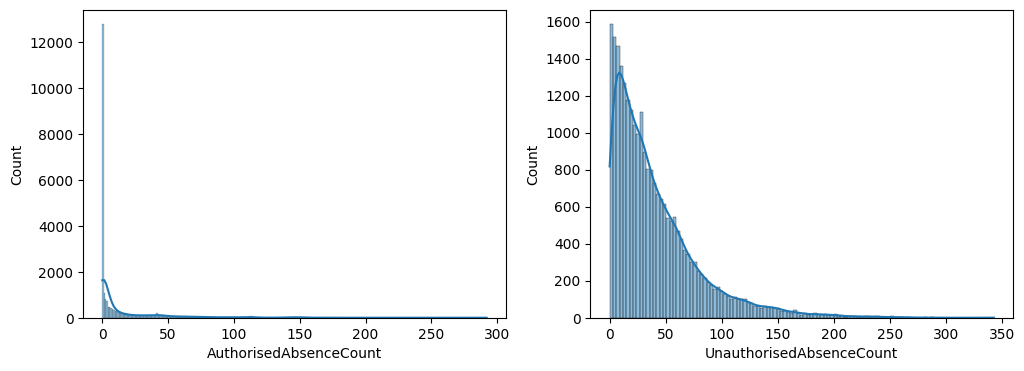

In [ ]:
# Plotted the distributions of the new features
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data_s2['AuthorisedAbsenceCount'], kde=True)
plt.subplot(1,2,2)
sns.histplot(data_s2['UnauthorisedAbsenceCount'], kde=True)
plt.show()

<Axes: >

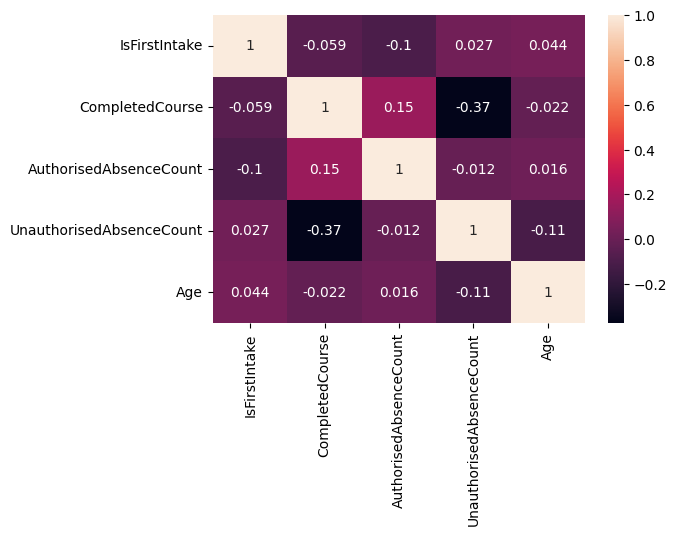

In [ ]:
# Review any notable correlations for the new features
data_s2.corr(numeric_only=True)
plt.figure(figsize=(6,4))
sns.heatmap(data_s2.corr(numeric_only=True),annot=True)

The plot above indicates that there is a moderately significant negative correlation (-0.37) between the number of **Unauthorised Absences** & the **Course Completion** likelihood.

In [ ]:
# One-Hot-Encoding using pandas for obj-type features
data_s2 = pd.get_dummies(data_s2,columns=['CentreName','BookingType','LeadSource','Gender','Nationality','CourseName','ProgressionUniversity'],
                      dtype=int) # drop_first=True -- reduce number of columns by n-1 per feature

# Ordinal encoding Ordinal feature: Course Level
OE = OrdinalEncoder(categories=[['Foundation','International Year One', 'International Year Two', 'Pre-Masters']])
data_s2['CourseLevel'] = OE.fit_transform(data_s2[['CourseLevel']])
data_s2['CourseLevel'] = data_s2['CourseLevel'].astype(int)


# Define the dataset & target variable (ONCE SCALING,TRANSFORMATIONS & ENCODING IS DONE)
y2 = data_s2['CompletedCourse'].copy()
x2 = data_s2.drop(['CompletedCourse'],axis=1).copy()

# Split the data into Train/Test
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.2,random_state=42,stratify=y2)

# Scale the training data (necessary for the NN, non-consequential for XGBoost)
scaler = RobustScaler()  # I am using robust as there are outliers in the age feature
x2_train[['Age','AuthorisedAbsenceCount','UnauthorisedAbsenceCount']] = scaler.fit_transform(x2_train[['Age','AuthorisedAbsenceCount','UnauthorisedAbsenceCount']])
x2_test[['Age','AuthorisedAbsenceCount','UnauthorisedAbsenceCount']] = scaler.transform(x2_test[['Age','AuthorisedAbsenceCount','UnauthorisedAbsenceCount']])

# Define the Training & Validation sets for the NN
nn_x2_train, nn_x2_val, nn_y2_train, nn_y2_val = train_test_split(x2_train, y2_train, test_size=0.1, random_state=42,stratify=y2_train)

In [ ]:
x2_train.head()

CourseLevel  IsFirstIntake  AuthorisedAbsenceCount  \
15349            3              0               -0.066667   
24358            3              0                3.933333   
11293            0              0                0.866667   
14439            1              0                1.066667   
13130            0              1               -0.066667   

       UnauthorisedAbsenceCount   Age  CentreName_ISC_Aberdeen  \
15349                 -0.477273  1.25                        0   
24358                  0.363636  1.50                        0   
11293                  0.318182 -0.50                        0   
14439                  0.772727 -0.25                        0   
13130                  0.431818  0.50                        0   

       CentreName_ISC_Cardiff  CentreName_ISC_Dublin  CentreName_ISC_Durham  \
15349                       0                      0                      0   
24358                       0                      0                      0   
11293                       0                      0                      0   
14439                       0                      0                      0   
13130                       0                      0                      0   

       CentreName_ISC_Holland  ...  \
15349                       0  ...   
24358                       0  ...   
11293                       0  ...   
14439                       0  ...   
13130                       0  ...   

       ProgressionUniversity_University College Dublin  \
15349                                                0   
24358                                                0   
11293                                                0   
14439                                                0   
13130                                                0   

       ProgressionUniversity_University of Aberdeen  \
15349                                             0   
24358                                             0   
11293                                             0   
14439                                             0   
13130                                             0   

       ProgressionUniversity_University of Huddersfield  \
15349                                                 0   
24358                                                 0   
11293                                                 0   
14439                                                 0   
13130                                                 0   

       ProgressionUniversity_University of Leeds  \
15349                                          0   
24358                                          0   
11293                                          1   
14439                                          0   
13130                                          0   

       ProgressionUniversity_University of Lincoln  \
15349                                            0   
24358                                            0   
11293                                            0   
14439                                            0   
13130                                            0   

       ProgressionUniversity_University of Sheffield International College  \
15349                                                  1                     
24358                                                  0                     
11293                                                  0                     
14439                                                  0                     
13130                                                  0                     

       ProgressionUniversity_University of Strathclyde  \
15349                                                0   
24358                                                0   
11293                                                0   
14439                                                0   
13130                                                0   

       ProgressionUniversity_University of Surre

## Neural Network & Tuning - Stage 2

In [ ]:
# Neural Network model
NN_Dropout2 = Sequential([
Input(shape=(nn_x2_train.shape[1],)),
Dense(400,activation='relu'),
Dense(200,activation='relu'),
Dense(1,activation='sigmoid')])

NN_Dropout2.summary()

#Define the evaluation metrics

keras_metrics = ['accuracy', 'precision', 'recall', 'AUC']
early_stop = EarlyStopping(monitor="val_loss", patience=5,
                           min_delta=0.001,
                           verbose=1,mode="auto", restore_best_weights=False,)

# Process pipeline
NN_Dropout2.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=keras_metrics)   # gives better results ['accuracy']
History_2 = NN_Dropout2.fit(nn_x2_train, nn_y2_train, epochs=50, batch_size=64, validation_data=(nn_x2_val, nn_y2_val), callbacks=early_stop, verbose=1) # verbose=2
Evaluation_2 = NN_Dropout2.evaluate(x2_test, y2_test)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 400)            │       159,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,001 (937.50 KB)

 Trainable params: 240,001 (937.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - AUC: 0.8635 - accuracy: 0.8857 - loss: 0.2884 - precision: 0.9047 - recall: 0.9685 - val_AUC: 0.9137 - val_accuracy: 0.9027 - val_loss: 0.2403 - val_precision: 0.9384 - val_recall: 0.9478
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.9051 - accuracy: 0.9034 - loss: 0.2414 - precision: 0.9314 - recall: 0.9573 - val_AUC: 0.9192 - val_accuracy: 0.9112 - val_loss: 0.2330 - val_precision: 0.9385 - val_recall: 0.9584
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.9190 - accuracy: 0.9103 - loss: 0.2274 - precision: 0.9353 - recall: 0.9611 - val_AUC: 0.9208 - val_accuracy: 0.9082 - val_loss: 0.2341 - val_precision: 0.9294 - val_recall: 0.9654
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.9195 - accuracy: 0.9100 - loss: 0.2289 - precision: 0.9335 - recall: 0.9626 - val_AUC: 0.9201 - val_accuracy: 0.9112 - val_loss: 0.2300 - val_precision: 0.9355 - val_recall: 0.9619
Epoch 5/50
282/282 ━━━━━━━━━━━━━

In [ ]:
# Stage 2 NN Tuning
def build_model(hp):
  NN_tuned_s2 = Sequential()
  # Input layer
  NN_tuned_s2.add(Input(shape=(nn_x2_train.shape[1],)))
  # Hyperparameters
  neuron_count = hp.Int('units', min_value=32, max_value=512, step=32) #units=hp.Int(f'units_{i}' > n_neurons in each layer
  opt_func = hp.Choice('optimizer', ['adam','rmsprop','sgd'])
  actv_func = hp.Choice('activation', ['relu', 'tanh'])

  # Hidden layers
  for i in range(hp.Int('num_layers', 1, 5)):
    neuron_count = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32) ### EACH LAYER HAS DIFFERENT NEURON COUNTS
    NN_tuned_s2.add(Dense(units=neuron_count, activation=actv_func))
  # Output layer
  NN_tuned_s2.add(Dense(units=1, activation='sigmoid'))

  # Adjust optimiser's learning rate
  if opt_func == 'adam':
    opt_func = Adam(learning_rate=hp.Float('learning_rate_adam', min_value=1e-4, max_value=1e-2, sampling='log'))
  elif opt_func == 'rmsprop':
    opt_func = RMSprop(learning_rate=hp.Float('learning_rate_adam', min_value=1e-4, max_value=1e-2, sampling='log'))
  elif opt_func == 'sgd':
    opt_func = SGD(learning_rate=hp.Float('learning_rate_sgd', min_value=1e-4, max_value=1e-2, sampling='log'))

  # Compile
  NN_tuned_s2.compile(loss='binary_crossentropy', optimizer=opt_func, metrics=keras_metrics)
  return NN_tuned_s2

  # Build the model
build_model(keras_tuner.HyperParameters())

# 2. Instantiate & Run the Search
tuner = RandomSearch(hypermodel=build_model, objective='val_loss',
                     max_trials=10, executions_per_trial=2,
                     overwrite=True, directory='my_dir',
                     project_name='student_dropout_NN_tuned')
# Get a summary
tuner.search_space_summary()
# Run search
tuner.search(nn_x2_train, nn_y2_train, epochs=50, validation_data=(nn_x2_val, nn_y2_val),
             callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

Trial 10 Complete [00h 01m 20s]
val_loss: 0.2387041449546814

Best val_loss So Far: 0.22938553243875504
Total elapsed time: 00h 24m 39s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 224)            │        89,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,601 (350.00 KB)

 Trainable params: 89,601 (350.00 KB)

 Non-trainable params: 0 (0.00 B)

None

Best hyperparameters found by the tuner:
{'units': 320, 'optimizer': 'rmsprop', 'activation': 'relu', 'num_layers': 1, 'units_0': 224, 'learning_rate_adam': 0.0009441488408008199}
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.8997 - accuracy: 0.9009 - loss: 0.2471 - precision: 0.9299 - recall: 0.9565
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Comparison of Default and Tuned Model Metrics on Stage 2 Test Data:


Default model S2  Tuned model S2
Loss               0.246018        0.246416
Accuracy           0.903432        0.903232
Precision          0.933242        0.928701
Recall             0.954705        0.959869
AUC                0.908263        0.906100

Confusion Matrix for S2 Tuned NN:


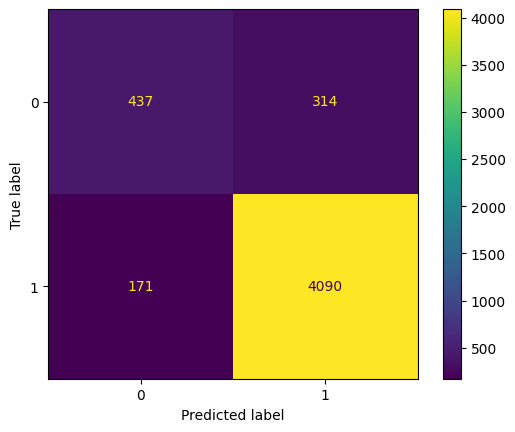

In [ ]:
# 3. Explore results
# Best Model
best_model_s2 = tuner.get_best_models(num_models=1)[0]
print(best_model_s2.summary())
# Best Hyperparameters
best_hps_s2 = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest hyperparameters found by the tuner:")
print(best_hps_s2.values)

# 4. Evaluate
Evaluation_Tuned_s2 = best_model_s2.evaluate(x2_test, y2_test)

# 5. Predict & Compare models
Tuned_pred_s2 = best_model_s2.predict(x2_test)
y2_tuned_pred = (Tuned_pred_s2 >= 0.5).astype(int)

# Comparing Default & Tuned Model prediction metrics (on STAGE 2 TEST data)
output_comparison_s2 = {'Default model S2': Evaluation_2, 'Tuned model S2': Evaluation_Tuned_s2}
metric_names = ['Loss', 'Accuracy', 'Precision', 'Recall', 'AUC']
metrics_result_s2 = pd.DataFrame(output_comparison_s2, index=metric_names)
print("\nComparison of Default and Tuned Model Metrics on Stage 2 Test Data:")
display(metrics_result_s2) # Can use display for better formatting in Colab
print('Confusion Matrix for S2 Tuned NN:')
cmds = ConfusionMatrixDisplay.from_predictions(y2_test, y2_tuned_pred)

## XGBoost & Tuning - Stage 2

Test Accuracy: 0.9056264964086194
Test Precision: 0.9294784580498866
Test Recall: 0.9619807556911523
Test AUC: 0.7739331208548971
Confusion Matrix for S2 XGB:


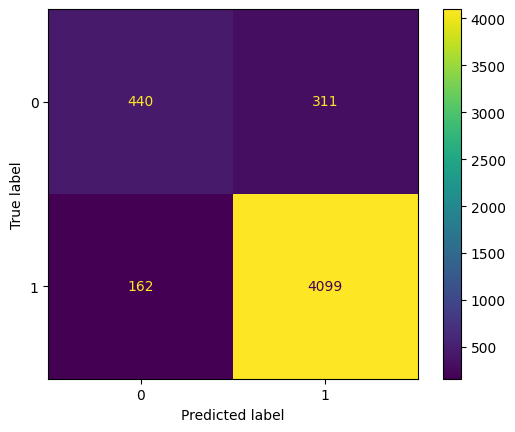

In [ ]:
# XGBOOST
## The XGBOOST model fitted on the training dataset
XGB_Dropped2 = XGBClassifier(random_state=42)
XG_trained2 = XGB_Dropped2.fit(x2_train, y2_train)
XGB_pred2 = XGB_Dropped2.predict(x2_test)

# Calculate the metric performances for the XGB model
default_accuracy2 = accuracy_score(y2_test, XGB_pred2)
default_precision2 = precision_score(y2_test, XGB_pred2)
default_recall2 = recall_score(y2_test, XGB_pred2)
default_roc_auc2 = roc_auc_score(y2_test, XGB_pred2)

print('Test Accuracy:', default_accuracy2)
print('Test Precision:', default_precision2)
print('Test Recall:', default_recall2)
print('Test AUC:', default_roc_auc2)
print('Confusion Matrix for S2 XGB:')
XGB_cmds2 = ConfusionMatrixDisplay.from_predictions(y2_test, XGB_pred2)

In [ ]:
# Tuning XGB2 using RandomizedSearchCV
from scipy.stats import randint, uniform
param_dist = {'n_estimators':randint(100,500),
              'max_depth':randint(3,12),
              'learning_rate':uniform(0.01,0.1)}

sklearn_metrics = ['accuracy', 'precision', 'recall', 'roc_auc']

XGB2_RandomSearch = RandomizedSearchCV(XGB_Dropped2, param_distributions=param_dist,
                                       scoring=sklearn_metrics, cv=5, verbose=2,
                                       refit='roc_auc', return_train_score=True)
XGB2_RandomSearch.fit(x2_train, y2_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.05295537724284872, max_depth=5, n_estimators=293; total time=   2.9s
[CV] END learning_rate=0.05295537724284872, max_depth=5, n_estimators=293; total time=   2.9s
[CV] END learning_rate=0.05295537724284872, max_depth=5, n_estimators=293; total time=   4.1s
[CV] END learning_rate=0.05295537724284872, max_depth=5, n_estimators=293; total time=   2.9s
[CV] END learning_rate=0.05295537724284872, max_depth=5, n_estimators=293; total time=   2.9s
[CV] END learning_rate=0.09757709112995581, max_depth=6, n_estimators=377; total time=   4.6s
[CV] END learning_rate=0.09757709112995581, max_depth=6, n_estimators=377; total time=   3.5s
[CV] END learning_rate=0.09757709112995581, max_depth=6, n_estimators=377; total time=   3.4s
[CV] END learning_rate=0.09757709112995581, max_depth=6, n_estimators=377; total time=   4.0s
[CV] END learning_rate=0.09757709112995581, max_depth=6, n_estimators=377; total time=   3.5s

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a65a8b57050>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a65a7580810>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a65a7574e90>},
                   refit='roc_auc', return_train_score=True,
                   scoring=['accuracy', 'precision', 'recall', 'roc_auc'],
                   verbose=2)

In [ ]:
# Review the best parameters
print(XGB2_RandomSearch.best_params_)

{'learning_rate': np.float64(0.05295537724284872), 'max_depth': 5, 'n_estimators': 293}


Test Accuracy: 0.903830806065443
Test Precision: 0.9270056497175141
Test Recall: 0.9626848157709458
Test AUC: 0.7662958033581759
Confusion Matrix for S2 Tuned XGB:


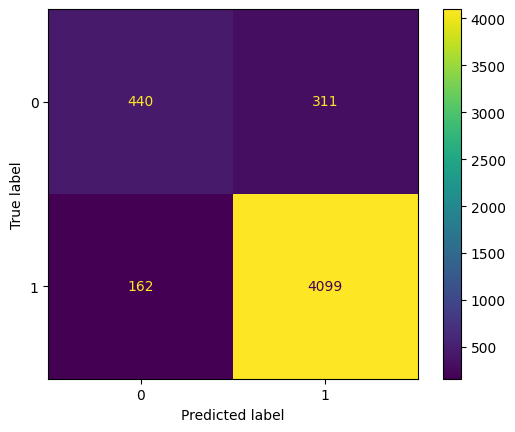

In [ ]:
# Tune & compare XGB models
XGB_Tuned2 = XGB2_RandomSearch.best_estimator_
XGB2_RandomSearch_pred = XGB_Tuned2.predict(x2_test)

tuned_accuracy2 = accuracy_score(y2_test, XGB2_RandomSearch_pred)
tuned_precision2 = precision_score(y2_test, XGB2_RandomSearch_pred)
tuned_recall2 = recall_score(y2_test, XGB2_RandomSearch_pred)
tuned_roc_auc2 = roc_auc_score(y2_test, XGB2_RandomSearch_pred)

print('Test Accuracy:', tuned_accuracy2)
print('Test Precision:', tuned_precision2)
print('Test Recall:', tuned_recall2)
print('Test AUC:', tuned_roc_auc2)

print('Confusion Matrix for S2 Tuned XGB:')
XGB_cmds2 = ConfusionMatrixDisplay.from_predictions(y2_test, XGB_pred2)

In [ ]:
print("Performance Comparison (STAGE 2 Test Set):")
print("-" * 40)
print(f"{'Metric':<15} {'Default Model S2':<15} {'Tuned Model S2':<15}")
print("-" * 40)
print(f"{'Accuracy':<15} {default_accuracy2:<15.4f} {tuned_accuracy2:<15.4f}")
print(f"{'Precision':<15} {default_precision2:<15.4f} {tuned_precision2:<15.4f}")
print(f"{'Recall':<15} {default_recall2:<15.4f} {tuned_recall2:<15.4f}")
print(f"{'AUC':<15} {default_roc_auc2:<15.4f} {tuned_roc_auc2:<15.4f}")
print("-" * 40)

Performance Comparison (STAGE 2 Test Set):
----------------------------------------
Metric          Default Model S2 Tuned Model S2 
----------------------------------------
Accuracy        0.9056          0.9038         
Precision       0.9295          0.9270         
Recall          0.9620          0.9627         
AUC             0.7739          0.7663         
----------------------------------------


Tuning the XGBoost model does not seem to provide any significant improvement on the performance metrics.




#### Commentary

Stage 2 introduced data related to student engagement, specifically authorised and unauthorised absences. This information created a more dynamic view of the student's interaction with their programme after enrollment.

Unauthorised absences which showed a negative correlation with academic success, allowed the models to gain a slightly better understanding of students who might be struggling to attend or engage. As a result, the models trained on this data showed a marginal improvement in predictive metrics, most significant improvement being in AUC - 3%. Tuning the models in this stage did not produce significant performance enhancements.

While the impact of the new feaures is limited of predictive capabilities, this stage is a step forward in understanding and leveraging behavioural indicators.

# Stage 3 data

In [ ]:
# File URL
file_url_3 = "https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-"

**Stage 3: Pre-processing instructions**

- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with >50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.
- Choose how to engage with rows that have missing values, which can be done in one of two ways for this project:
  *   Impute the rows with appropriate values.
  *   Remove rows with missing values but ONLY in cases where rows with missing values are minimal: <2% of the overall data.






In [ ]:
data_s3 = pd.read_csv(file_url_3)
data_s3.head()

CentreName  LearnerCode BookingType              LeadSource DiscountType  \
0  ISC_Aberdeen      2284932       Agent  Standard Agent Booking          NaN   
1  ISC_Aberdeen      2399500       Agent  Standard Agent Booking          NaN   
2  ISC_Aberdeen      2424946       Agent  Standard Agent Booking          NaN   
3  ISC_Aberdeen      2426583       Agent  Standard Agent Booking          NaN   
4  ISC_Aberdeen      2434674       Agent  Standard Agent Booking          NaN   

  DateofBirth Gender Nationality                          HomeState  \
0  13/01/1998   Male     Chinese  Jianye District; Jiangsu Province   
1   12/2/1998   Male     Chinese                                NaN   
2    7/4/2000   Male     Chinese                                NaN   
3  18/05/1999   Male     Chinese                                NaN   
4  19/04/1996   Male     Chinese                                NaN   

                 HomeCity  ...  \
0                 Nanjing  ...   
1                   Xi'an  ...   
2                 Chengdu  ...   
3  LIUYANG CITY ;CHANGSHA  ...   
4                  Xiamen  ...   

                                          CourseName IsFirstIntake  \
0                       Business and Law Pre-Masters          True   
1   Life Sciences Undergraduate Foundation Programme         False   
2  Business Management and Finance International ...         False   
3  Business Management and Finance International ...          True   
4                       Business and Law Pre-Masters          True   

   CompletedCourse AssessedModules  PassedModules  FailedModules  \
0              Yes             4.0            4.0            0.0   
1              Yes             7.0            7.0            0.0   
2              Yes             8.0            8.0            0.0   
3              Yes             8.0            8.0            0.0   
4              Yes             4.0            4.0            0.0   

                               ProgressionDegree   ProgressionUniversity  \
0  Msc Econ Accounting and Investment Management  University of Aberdeen   
1                        BSc Biological Sciences  University of Aberdeen   
2                                     MA Finance  University of Aberdeen   
3                         MA Business Management  University of Aberdeen   
4          MSc International Business Management  University of Aberdeen   

  AuthorisedAbsenceCount  UnauthorisedAbsenceCount  
0                    NaN                       NaN  
1                   93.0                       5.0  
2                   92.0                       6.0  
3                   67.0                      15.0  
4                    NaN                       NaN  

[5 rows x 21 columns]

In [ ]:
# Dataset characteristics
data_s3.info()
print('\n Unique values per feature \n', data_s3.nunique())
print('\n Missing values per feature \n', data_s3.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                25059 non-null  object 
 1   LearnerCode               25059 non-null  int64  
 2   BookingType               25059 non-null  object 
 3   LeadSource                25059 non-null  object 
 4   DiscountType              7595 non-null   object 
 5   DateofBirth               25059 non-null  object 
 6   Gender                    25059 non-null  object 
 7   Nationality               25059 non-null  object 
 8   HomeState                 8925 non-null   object 
 9   HomeCity                  21611 non-null  object 
 10  CourseLevel               25059 non-null  object 
 11  CourseName                25059 non-null  object 
 12  IsFirstIntake             25059 non-null  bool   
 13  CompletedCourse           25059 non-null  object 
 14  Assess

In [ ]:
# Convert data types
data_s3['DateofBirth'] = pd.to_datetime(data_s3['DateofBirth'], dayfirst=True)
today = pd.Timestamp.now()
data_s3['Age'] = (today - data_s3['DateofBirth']).dt.days / 365.25
data_s3['Age'] = data_s3['Age'].round().astype(int)

#Convert Target variable Yes & No column to boolean values
data_s3['CompletedCourse'] = data_s3['CompletedCourse'].map({'Yes': 1, 'No': 0}) #.astype(bool)
data_s3['IsFirstIntake'] = data_s3['IsFirstIntake'].astype(int)

#Drop irrelevant columns
data_s3.drop(['LearnerCode','DateofBirth','HomeCity','HomeState','DiscountType', 'ProgressionDegree'], axis=1, inplace=True)

In [ ]:
# Select rows where there is missing data
data_s3[data_s3[['FailedModules','PassedModules','AssessedModules']].isnull().any(axis=1)]

CentreName BookingType              LeadSource  Gender  Nationality  \
6      ISC_Aberdeen       Agent  Standard Agent Booking    Male      Chinese   
84     ISC_Aberdeen       Agent  Standard Agent Booking  Female      Angolan   
103    ISC_Aberdeen       Agent  Standard Agent Booking    Male    Taiwanese   
108    ISC_Aberdeen      Direct                     APD    Male      Chinese   
140    ISC_Aberdeen       Agent  Standard Agent Booking  Female      Ugandan   
...             ...         ...                     ...     ...          ...   
25032  ISC_Teesside       Agent  Standard Agent Booking    Male  Bangladeshi   
25035  ISC_Teesside       Agent  Standard Agent Booking    Male  Bangladeshi   
25036  ISC_Teesside       Agent  Standard Agent Booking    Male  Bangladeshi   
25042  ISC_Teesside       Agent  Standard Agent Booking    Male   Sri Lankan   
25057  ISC_Teesside       Agent  Standard Agent Booking    Male    Pakistani   

                  CourseLevel  \
6                  Foundation   
84                 Foundation   
103                Foundation   
108    International Year Two   
140               Pre-Masters   
...                       ...   
25032              Foundation   
25035              Foundation   
25036              Foundation   
25042              Foundation   
25057              Foundation   

                                              CourseName  IsFirstIntake  \
6      Business; Economics; Accounting and Real Estat...              0   
84     Humanities; Law and Social Science Undergradua...              0   
103    Physical Sciences and Engineering Undergraduat...              0   
108    Business Management and Finance International ...              0   
140                         Business and Law Pre-Masters              0   
...                                                  ...            ...   
25032  International Foundation Year Business; Humani...              0   
25035  International Foundation Year Business; Humani...              0   
25036  International Foundation Year Business; Humani...              0   
25042  International Foundation Year Business; Humani...              0   
25057  International Foundation Year Business; Humani...              0   

       CompletedCourse  AssessedModules  PassedModules  FailedModules  \
6                    0              NaN            NaN            NaN   
84                   0              NaN            NaN            NaN   
103                  0              NaN            NaN            NaN   
108                  0              NaN            NaN            NaN   
140                  0              NaN            NaN            NaN   
...                ...              ...            ...            ...   
25032                0              NaN            NaN            NaN   
25035                0              NaN            NaN            NaN   
25036                0              NaN            NaN            NaN   
25042                0              NaN            NaN            NaN   
25057                0              NaN            NaN            NaN   

        ProgressionUniversity  AuthorisedAbsenceCount  \
6      University of Aberdeen                    29.0   
84     University of Aberdeen                     6.0   
103    University of Aberdeen                     7.0   
108    University of Aberdeen                     8.0   
140    University of Aberdeen                     NaN   
...                       ...                     ...   
25032     Teesside University                     0.0   
25035     Teesside University                     0.0   
25036     Teesside University                     0.0   
25042     Teesside University                     0.0   
25057     Teesside University                     0.0   

       UnauthorisedAbsenceCount  Age  
6                          18.0   23  
84                         20.0   24  
103                        29.0   25  
108                        32.0 

In [ ]:
#data_s3.drop(data_s3[data_s3[['FailedModules','PassedModules','AssessedModules']].isnull().any(axis=1)].index, inplace=True)

In [ ]:
data_s3.describe().round(2)

IsFirstIntake  CompletedCourse  AssessedModules  PassedModules  \
count       25059.00         25059.00         22828.00       22828.00   
mean            0.12             0.85             6.09           5.58   
std             0.33             0.36             1.81           2.36   
min             0.00             0.00             1.00           0.00   
25%             0.00             1.00             4.00           4.00   
50%             0.00             1.00             6.00           6.00   
75%             0.00             1.00             7.00           7.00   
max             1.00             1.00            12.00          11.00   

       FailedModules  AuthorisedAbsenceCount  UnauthorisedAbsenceCount  \
count       22828.00                24851.00                  24851.00   
mean            0.51                   15.12                     40.49   
std             1.30                   28.92                     39.03   
min             0.00                    0.00                      0.00   
25%             0.00                    0.00                     12.00   
50%             0.00                    1.00                     29.00   
75%             0.00                   15.00                     56.00   
max            10.00                  292.00                    343.00   

            Age  
count  25059.00  
mean      24.99  
std        3.17  
min       19.00  
25%       23.00  
50%       24.00  
75%       27.00  
max       63.00

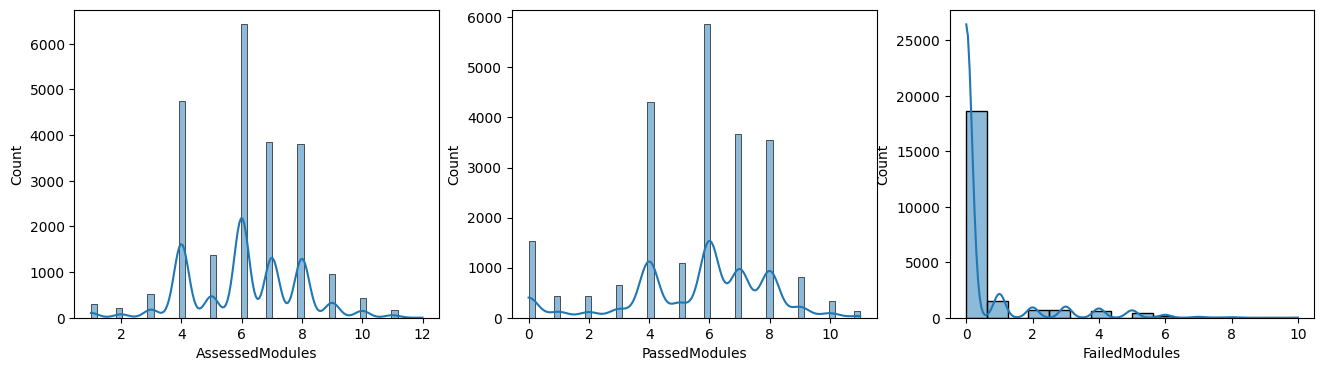

In [ ]:
# Plotted the distributions of the new features
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.histplot(data_s3['AssessedModules'], kde=True)
plt.subplot(1,3,2)
sns.histplot(data_s3['PassedModules'], kde=True)
plt.subplot(1,3,3)
sns.histplot(data_s3['FailedModules'], kde=True)
plt.show()

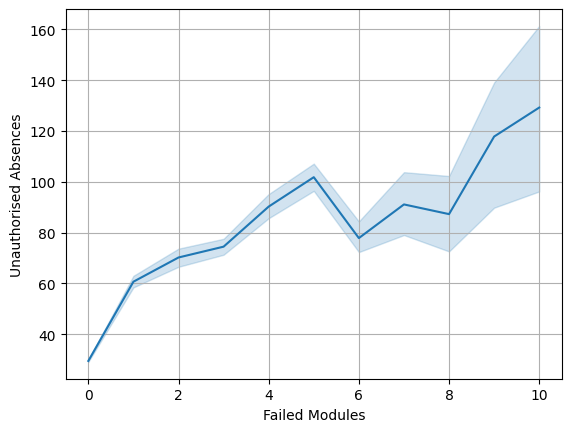

In [ ]:
# Explore the relationship between failed modules & abscences
sns.lineplot(data_s3,x='FailedModules',y='UnauthorisedAbsenceCount',)
plt.xlabel('Failed Modules')
plt.ylabel('Unauthorised Absences')
plt.grid()

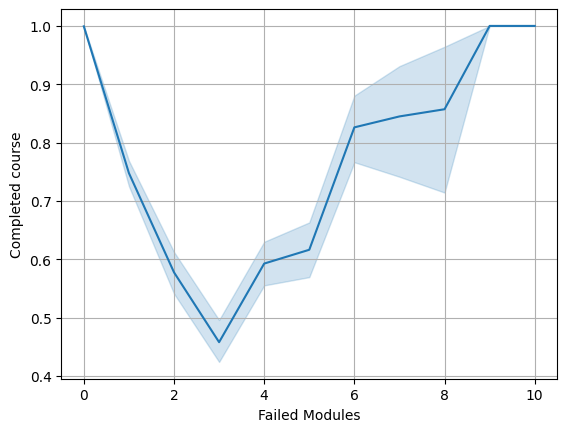

In [ ]:
# Explore the relationship between failed modules & course completion
sns.lineplot(data_s3,x='FailedModules',y='CompletedCourse',)
plt.xlabel('Failed Modules')
plt.ylabel('Completed course')
plt.grid()

The first graph is indicative of the significant relationship between Unauthorised Absences and Failed modules, while the second indicates that failing more than 2 modules is associated with a lower likelihood of completing the course — and could be a strong indicator of potential dropout.

The evaluation of the models built on Stage 3 data will further validate these theoretical relationships

<Axes: >

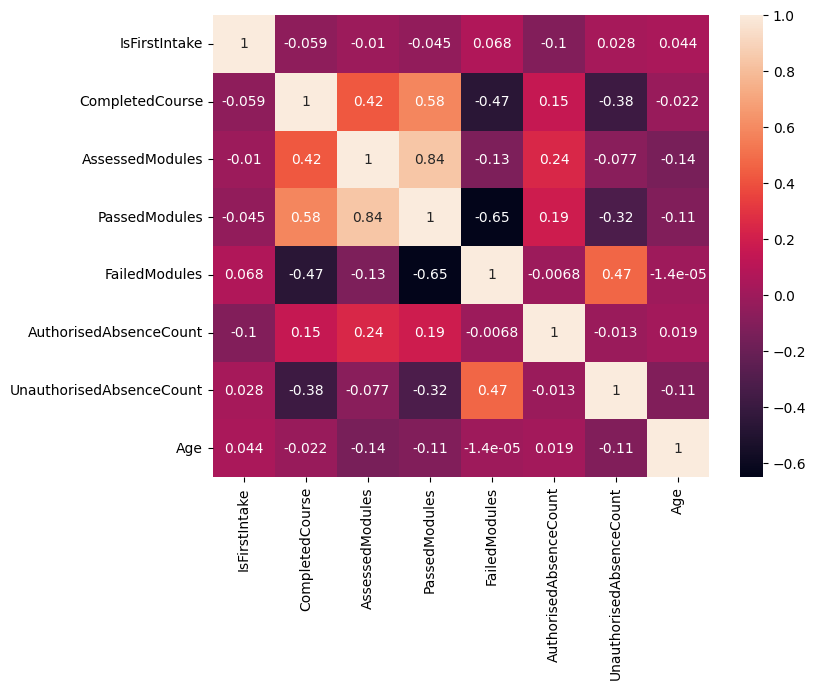

In [ ]:
# Explore correlations between numeric variables & target(Completed course)
plt.figure(figsize=(8,6))
sns.heatmap(data_s3.corr(numeric_only=True),annot=True)

The additional features introduced into the Stage 3 dataset provide us with more detailed insights into the relationship between student progress and the target variable.

In particular, a moderate to strong positive correlation was observed between the number of modules a student has undergone formal assessment in, the number of modules passed, and the likelihood of Course completion. This aligns with the intuitive understanding that academic progress is a key indicator of successful programme completion.

Conversely, there was a notable negative correlation between the number of failed modules and the probability of Course completion. Similarly, Unauthorised Absence Count demonstrated a negative relationship with course completion likelihood, and a positive relationship with FailedModules. These observations suggest that academic difficulties and lack of engagement, as reflected by failed modules and unauthorized absences, are significant indicators of potential student dropout.



In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select columns to impute using Iterative imputer
cols_to_impute = ['FailedModules', 'PassedModules', 'AssessedModules', 'AuthorisedAbsenceCount', 'UnauthorisedAbsenceCount']
data_subset = data_s3[cols_to_impute]

# Create the imputer
imputer = IterativeImputer(random_state=42, sample_posterior=False)

# Fit and transform
imputed_data = pd.DataFrame(imputer.fit_transform(data_subset), columns=cols_to_impute)

# Replace the original columns with imputed ones
data_s3[cols_to_impute] = imputed_data

Around 9% of the newly added features were missing values. Removing these rows was considered, but this would have resulted in a substantial loss of valuable information. The Iterative Imputer was selected for filling in the missing values due to its more advanced predictive method based on observed data. This approach was further supported by the moderate correlation found between 'Unauthorised Absence Count' and both 'Passed Modules' and 'Failed Modules', highlighting the interconnectedness of these features.

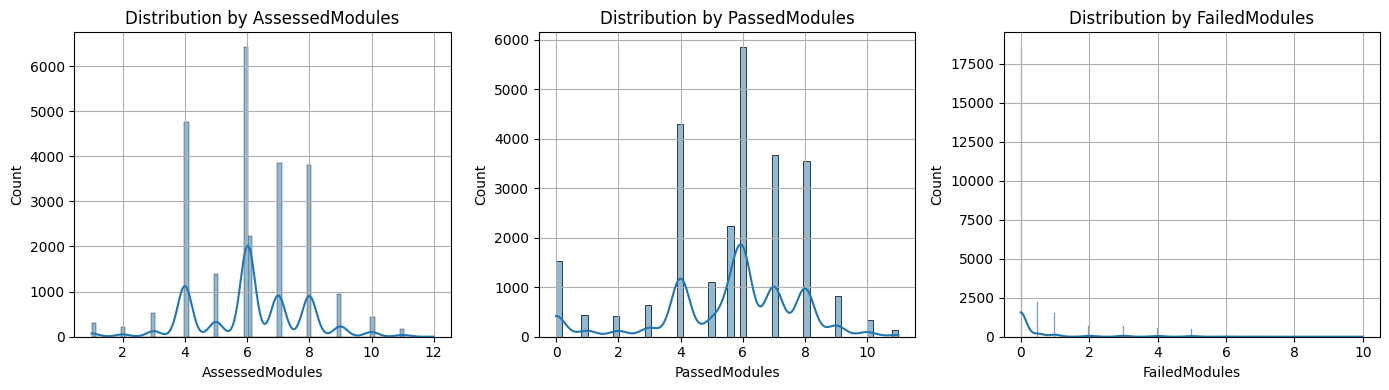

In [ ]:
# Review new features post-imputation
new_varbls = ['AssessedModules', 'PassedModules', 'FailedModules']

plt.figure(figsize=(14,4))

for i, col in enumerate(new_varbls):
    plt.subplot(1,len(new_varbls),i+1)
    sns.histplot(data=data_s3[new_varbls],x=col,kde=True)
    plt.title(f'Distribution by {col}')
    plt.grid()
    plt.tight_layout()

In [ ]:
# Preserved the distribution of the Y variable
data_s3['CompletedCourse'].value_counts(normalize=True).round(2)

CompletedCourse
1    0.85
0    0.15
Name: proportion, dtype: float64

In [ ]:
#Encode features
data_s3 = pd.get_dummies(data_s3,columns=['CentreName','BookingType','LeadSource','Gender','Nationality','CourseName','ProgressionUniversity'],
                      dtype=int)

OE = OrdinalEncoder(categories=[['Foundation','International Year One', 'International Year Two', 'Pre-Masters']])
data_s3['CourseLevel'] = OE.fit_transform(data_s3[['CourseLevel']])
data_s3['CourseLevel'] = data_s3['CourseLevel'].astype(int)

#Split data
y3 = data_s3['CompletedCourse'].copy()
x3 = data_s3.drop(['CompletedCourse'],axis=1).copy()
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.2,random_state=42,stratify=y3)

# Scale the training data (necessary for the NN, non-consequential for XGBoost)
scaler = RobustScaler()
sc_features = ['FailedModules', 'PassedModules', 'AssessedModules', 'AuthorisedAbsenceCount', 'UnauthorisedAbsenceCount', 'Age']
x3_train[sc_features] = scaler.fit_transform(x3_train[sc_features])
x3_test[sc_features] = scaler.transform(x3_test[sc_features])

# Define the Training & Validation sets for the NN
nn_x3_train, nn_x3_val, nn_y3_train, nn_y3_val = train_test_split(x3_train, y3_train, test_size=0.1, random_state=42,stratify=y3_train)

## Neural Network - Stage 3

In [ ]:
# NN
NN_Dropout3 = Sequential([
Input(shape=(nn_x3_train.shape[1],)),
Dense(400,activation='relu'),
Dense(200,activation='relu'),
Dense(1,activation='sigmoid')])

NN_Dropout3.summary()

#Define the evaluation metrics
keras_metrics = ['accuracy', 'precision', 'recall', 'AUC']
early_stop = EarlyStopping(monitor="val_loss", patience=5,
                           min_delta=0.001,
                           verbose=1,mode="auto", restore_best_weights=False,)

# Process pipeline
NN_Dropout3.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=keras_metrics)
History_3 = NN_Dropout3.fit(nn_x3_train, nn_y3_train, epochs=50, batch_size=64, validation_data=(nn_x3_val, nn_y3_val),callbacks=early_stop, verbose=1) # verbose=2
Evaluation_3 = NN_Dropout3.evaluate(x3_test, y3_test)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 400)            │       160,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,201 (942.19 KB)

 Trainable params: 241,201 (942.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.9487 - accuracy: 0.9118 - loss: 0.1936 - precision: 0.9374 - recall: 0.9603 - val_AUC: 0.9913 - val_accuracy: 0.9791 - val_loss: 0.0743 - val_precision: 0.9787 - val_recall: 0.9971
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9960 - accuracy: 0.9796 - loss: 0.0536 - precision: 0.9874 - recall: 0.9886 - val_AUC: 0.9963 - val_accuracy: 0.9890 - val_loss: 0.0399 - val_precision: 0.9912 - val_recall: 0.9959
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9976 - accuracy: 0.9870 - loss: 0.0344 - precision: 0.9919 - recall: 0.9927 - val_AUC: 0.9965 - val_accuracy: 0.9865 - val_loss: 0.0402 - val_precision: 0.9929 - val_recall: 0.9912
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.9985 - accuracy: 0.9898 - loss: 0.0275 - precision: 0.9929 - recall: 0.9951 - val_AUC: 0.9968 - val_accuracy: 0.9776 - val_loss: 0.0573 - val_precision: 0.9935 - val_recall: 0.9801
Epoch 5/50
282/282 ━━━━━━━━━━━━━

In [ ]:
# Stage 3 Model evaluation
print('Test Accuracy:', Evaluation_3[1])
print('Test Precision:', Evaluation_3[2])
print('Test Recall:', Evaluation_3[3])
print('Test AUC:', Evaluation_3[4])

Test Accuracy: 0.9884277582168579
Test Precision: 0.9918090105056763
Test Recall: 0.9946022033691406
Test AUC: 0.9933174252510071


## XGBoost - Stage 3

Test Accuracy: 0.99122106943336
Test Precision: 0.9936782954811519
Test Recall: 0.9960103262145036
Test AUC: 0.9800291311498616
Confusion Matrix for S3 XGB:


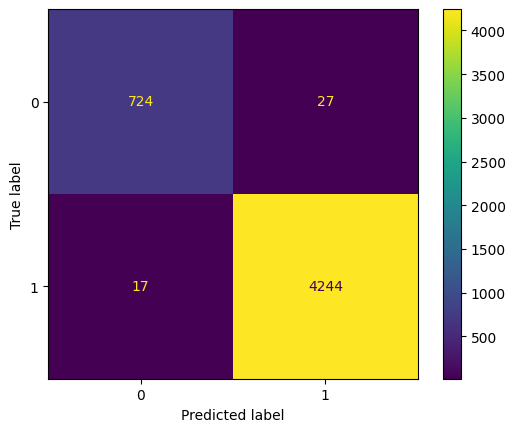

In [ ]:
# XGBOOST
## The XGBOOST model fitted on the training dataset
XGB_Dropped3 = XGBClassifier(random_state=42)
XG_trained3 = XGB_Dropped3.fit(x3_train, y3_train)
XGB_pred3 = XGB_Dropped3.predict(x3_test)

# Calculate the metric performances for the XGB model
default_accuracy3 = accuracy_score(y3_test, XGB_pred3)
default_precision3 = precision_score(y3_test, XGB_pred3)
default_recall3 = recall_score(y3_test, XGB_pred3)
default_roc_auc3 = roc_auc_score(y3_test, XGB_pred3)

print('Test Accuracy:', default_accuracy3)
print('Test Precision:', default_precision3)
print('Test Recall:', default_recall3)
print('Test AUC:', default_roc_auc3)

print('Confusion Matrix for S3 XGB:')
XGB_cmds3 = ConfusionMatrixDisplay.from_predictions(y3_test, XGB_pred3)

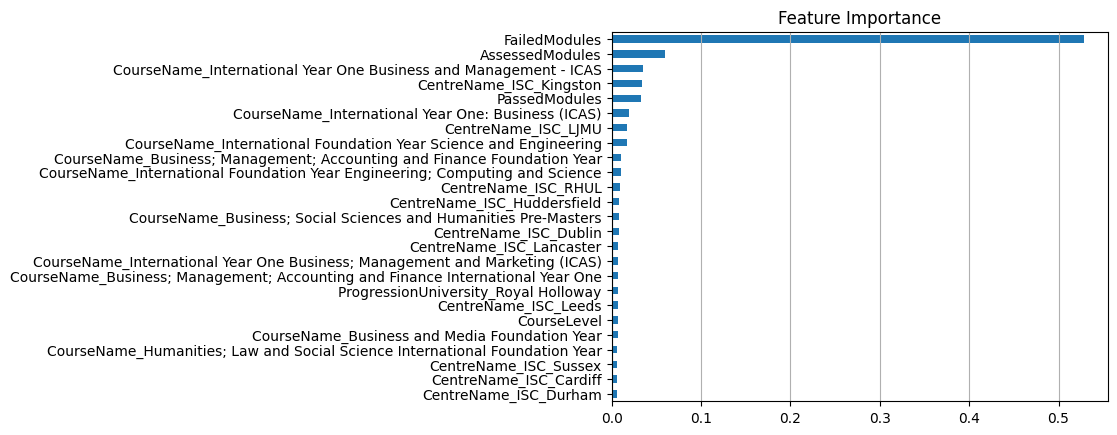

In [ ]:
# Plotting the feature importance
feature_importance = pd.Series(XG_trained3.feature_importances_, index=x3_train.columns).sort_values()
feature_importance.iloc[-25:].plot.barh(title='Feature Importance') # showing only the top most 25
plt.grid(axis='x')

The newly generated feature importance plot applied to the stage 3 data highlights that Academic performance, and in particular Failed modules is the primary driver of the model’s predictions. Other notable features are specific course and centre names, those however have a significantly lower impact.

This supports the earlier hypothesis that failing more than 2 modules is a strong dropout indicator.

### Tuning the models for Stage 3:

Given the strong performance achieved by both the XGBoost and Neural Network models on the Stage 3 dataset, as evidenced by the evaluation metrics, further hyperparameter tuning was not deemed necessary. The current performance levels suggest that additional optimisation efforts would likely yield only marginal improvements.

## Final Comparison & Evaluation

In [ ]:
# Compare NN metrics across all 3 Stages
output_comparison_final = {'Stage 1': Evaluation, 'Stage 2': Evaluation_2, 'Stage 3': Evaluation_3}
metric_names_comp = ['Loss', 'Accuracy', 'Precision', 'Recall', 'AUC']
metrics_result_final = pd.DataFrame(output_comparison_final, index=metric_names_comp)

print("\nComparison of Neural Network performance across 3 Stages:")
display(metrics_result_final)


Comparison of Neural Network performance across 3 Stages:


Stage 1   Stage 2   Stage 3
Loss       0.337396  0.246018  0.038016
Accuracy   0.880088  0.903432  0.988428
Precision  0.916856  0.933242  0.991809
Recall     0.944614  0.954705  0.994602
AUC        0.858962  0.908263  0.993317

In [161]:
# Compare XGBoost metrics across all 3 Stages
print("Comparison of XGBoost Performance across Stages 1/2/3:")
print("-" * 60)
print(f"{'Metric':<15} {'XGB Stage 1':<15} {'XGB Stage 2':<15} {'XGB Stage 3':<15}")
print("-" * 60)
print(f"{'Accuracy':<15} {default_accuracy:<15.4f} {default_accuracy2:<15.4f} {default_accuracy3:<15.4f}")
print(f"{'Precision':<15} {default_precision:<15.4f} {default_precision2:<15.4f} {default_precision3:<15.4f}")
print(f"{'Recall':<15} {default_recall:<15.4f} {default_recall2:<15.4f} {default_recall3:<15.4f}")
print(f"{'AUC':<15} {default_roc_auc:<15.4f} {default_roc_auc2:<15.4f} {default_roc_auc3:<15.4f}")
print("-" * 60)

Comparison of XGBoost Performance across Stages 1/2/3:
------------------------------------------------------------
Metric          XGB Stage 1     XGB Stage 2     XGB Stage 3    
------------------------------------------------------------
Accuracy        0.8945          0.9056          0.9912         
Precision       0.9210          0.9295          0.9937         
Recall          0.9580          0.9620          0.9960         
AUC             0.7460          0.7739          0.9800         
------------------------------------------------------------


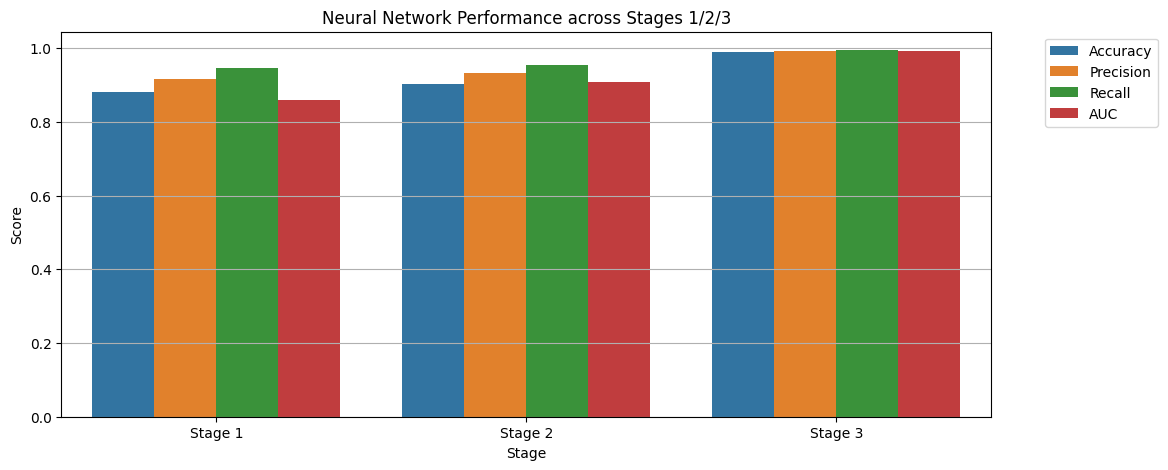



Comparison of Neural Network Performance across Stages 1/2/3:


Stage 1   Stage 2   Stage 3
Accuracy   0.880088  0.903432  0.988428
Precision  0.916856  0.933242  0.991809
Recall     0.944614  0.954705  0.994602
AUC        0.858962  0.908263  0.993317

In [235]:
# Visualise using Grouped bar-charts
# Reset index & melt dataframe to long form
metrics_result_final_ls = metrics_result_final.drop('Loss')
metrics_result_final_long = metrics_result_final_ls.reset_index().melt(id_vars='index', var_name='Stage', value_name='Score')
metrics_result_final_long = metrics_result_final_long.rename(columns={'index': 'Metric'})

plt.figure(figsize=(12,5))
plt.title('Neural Network Performance across Stages 1/2/3')
sns.barplot(metrics_result_final_long, x='Stage', y='Score', hue='Metric')
plt.ylabel('Score')
plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.show()

print('\n')
print("Comparison of Neural Network Performance across Stages 1/2/3:")
metrics_result_final_ls

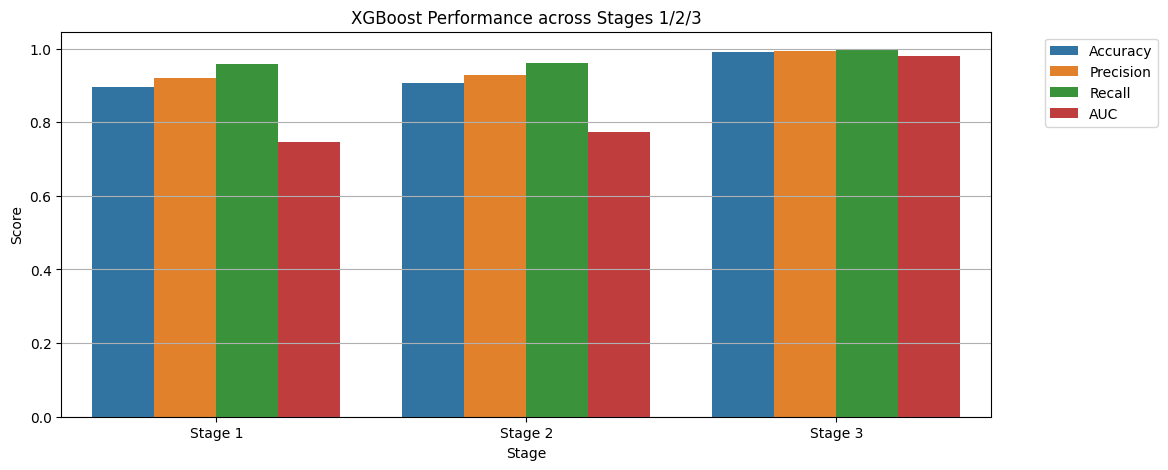



Comparison of XGBoost Performance across Stages 1/2/3:


Stage 1   Stage 2   Stage 3
Accuracy   0.894453  0.905626  0.991221
Precision  0.921029  0.929478  0.993678
Recall     0.957991  0.961981  0.996010
AUC        0.745973  0.773933  0.980029

In [236]:
# Group data in DF for convenience
XGB_metrics = {'Stage 1':[default_accuracy, default_precision, default_recall, default_roc_auc],
 'Stage 2':[default_accuracy2, default_precision2, default_recall2, default_roc_auc2],
 'Stage 3':[default_accuracy3, default_precision3, default_recall3, default_roc_auc3]}

metric_names = ['Accuracy', 'Precision', 'Recall', 'AUC']

XGB_metrics_df = pd.DataFrame(XGB_metrics, index=metric_names)

# Convert to long form...
XGB_metrics_long = XGB_metrics_df.reset_index().melt(id_vars='index', var_name='Stage', value_name='Score')
XGB_metrics_long = XGB_metrics_long.rename(columns={'index': 'Metric'})


plt.figure(figsize=(12,5))
plt.title('XGBoost Performance across Stages 1/2/3')
sns.barplot(data=XGB_metrics_long, x='Stage', y='Score', hue='Metric')
plt.ylabel('Score')
plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.show()

print('\n')
print("Comparison of XGBoost Performance across Stages 1/2/3:")
XGB_metrics_df

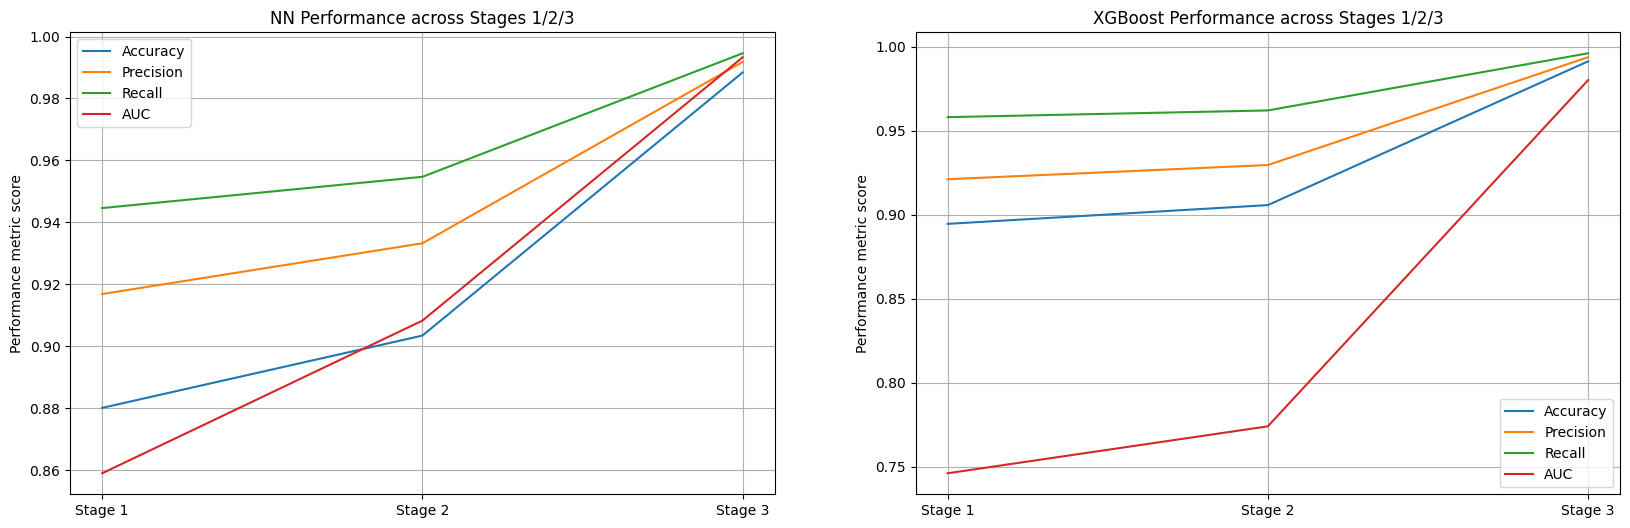

In [202]:
# Plot linegraph for both models
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('NN Performance across Stages 1/2/3')
plt.plot(metrics_result_final.loc['Accuracy'])
plt.plot(metrics_result_final.loc['Precision'])
plt.plot(metrics_result_final.loc['Recall'])
plt.plot(metrics_result_final.loc['AUC'])
plt.ylabel('Performance metric score')
plt.legend(labels=['Accuracy', 'Precision', 'Recall', 'AUC'])
plt.grid()

plt.subplot(1,2,2)
plt.title('XGBoost Performance across Stages 1/2/3')
plt.plot(XGB_metrics_df.loc['Accuracy'])
plt.plot(XGB_metrics_df.loc['Precision'])
plt.plot(XGB_metrics_df.loc['Recall'])
plt.plot(XGB_metrics_df.loc['AUC'])
plt.ylabel('Performance metric score')
plt.legend(labels=['Accuracy', 'Precision', 'Recall', 'AUC'])
plt.grid()

plt.show()

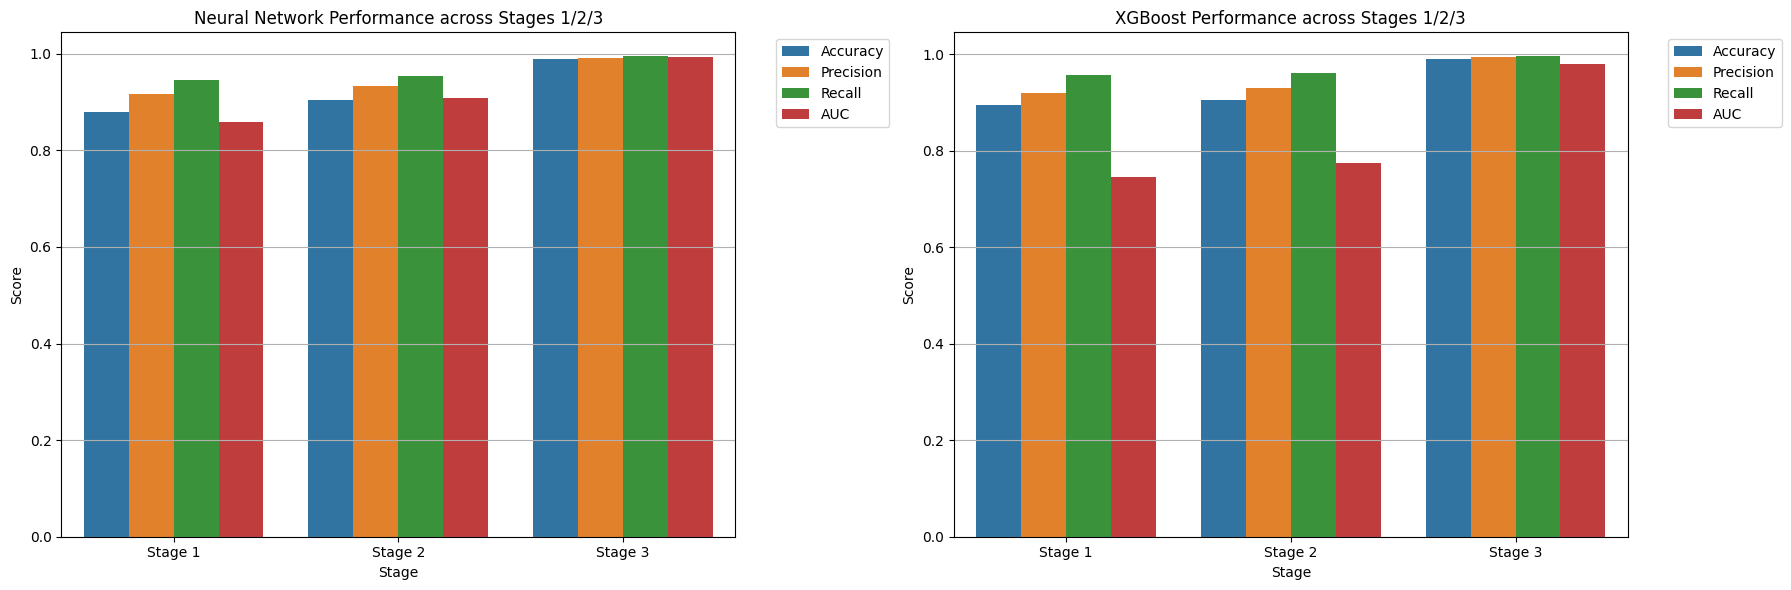

In [231]:
# Plot Side-by-side Barchart for both models
plt.figure(figsize=(18,6))
# NN
plt.subplot(1,2,1)
plt.title('Neural Network Performance across Stages 1/2/3')
sns.barplot(metrics_result_final_long, x='Stage', y='Score', hue='Metric')
plt.ylabel('Score')
plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
# XGB
plt.subplot(1,2,2)
plt.title('XGBoost Performance across Stages 1/2/3')
sns.barplot(data=XGB_metrics_long, x='Stage', y='Score', hue='Metric')
plt.ylabel('Score')
plt.grid(axis='y')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')

plt.tight_layout()
plt.show()

#### Commentary & Proposed recommendations:

Stage 3 imcorporated crucial academic performance data, including assessed, passed, and failed modules. Correlation analysis indicated that academic performance is a strong indicator of a student's ability to succeed in their programme.

Failing modules was shown to have a strong negative correlation with course completion. By including these metrics into the analysis, the models were given powerful features directly reflecting the student's academic progress and difficulties. This resulted in a substantial increase in all metrics, including both AUC (98-99%) and Recall (99%), as the models could very accurately identify students who were at a higher risk of dropping out. Due to this, further parameter tuning was decided to be unnecessary due to the potentially marginal gains.

The conducted data exploration and analysis provided valuable insights into the factors influencing student dropout. To support Study Group's goal of improving student retention, the following recommendations are proposed:

- **Refine Candidate Vetting**: Conduct further investigation and incorporate predictive indicators identified in the application data into the admissions process to better evaluate dropout risk and provide tailored support.
- **Enhance Student Engagement Monitoring**: Integrate systems for continuous monitoring of student engagement metrics and develop automated alerts to flag students exhibiting decreasing attendance.
- **Strengthen Academic Support**: Design and implement targeted programmes for addressing academic learning challenges.

# Declaration
By submitting your project, you indicate that the work is your own and has been created with academic integrity. Refer to the **Cambridge plagiarism regulations**.
